# Name: Ajit A Gouda

# Batch Number:DSG0523

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
import plotly.express as px

In [191]:
df=pd.read_csv('crime_datasets.csv')

In [192]:
df

State/UT  Year  population(total)      Rural     Urban  \
0         A& N ISLANDS  2001             356152     239954    116198   
1       ANDHRA PRADESH  2001           76210007   55401067  20808940   
2    ARUNACHAL PRADESH  2001            1097968     870087    227881   
3                ASSAM  2001           26655528   23216288   3439240   
4                BIHAR  2001           82998509   74316709   8681800   
..                 ...   ...                ...        ...       ...   
415         TAMIL NADU  2012           72867204   40524361  32342843   
416            TRIPURA  2012            3717661    3088869    628792   
417      UTTAR PRADESH  2012          202226609  159783555  42443054   
418        UTTARAKHAND  2012           10260421    7670906   2589515   
419        WEST BENGAL  2012           92575564   66749935  25825629   

         Tot_M     Tot_F        P_LIT       M_LIT     F_LIT  ...  \
0       192972    163180     253135.0    146831.0    106304  ...   
1     38527413  37682594   39934323.0  23444788.0  16489535  ...   
2       579941    518027     484785.0    303281.0    181504  ...   
3     13777037  12878491   14015354.0   8188697.0   5826657  ...   
4     43243795  39754714   31109577.0  20644376.0  10465201  ...   
..         ...       ...          ...         ...       ...  ...   
415   36680044  36477172   53274562.0  28573260.0  24701302  ...   
416    1889371   1826534    2897340.0   1538903.0   1355550  ...   
417  107092522  96666476  118889202.0  70418482.0  48470720  ...   
418    5240528   5136562    7100774.0   3971891.0   3128883  ...   
419   47417544  45045160   63274096.0  34529005.0  28745091  ...   

     IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                              0                            0   
1                                              7                         7400   
2                                              0                            0   
3                                              0                         2010   
4                                             83                         2406   
..                                           ...                          ...   
415                                            0                        15499   
416                                            0                           10   
417                                            0                        14406   
418                                            0                          670   
419                                           12                         4385   

     OTHER IPC CRIMES  TOTAL IPC CRIMES  Total Crimes  tot_crimes_sc  \
0                 323               658          1386              0   
1               34344            130089        278982           2933   
2                 618              2342          5243              0   
3                9315             36877         81418              6   
4               36667             88432        189612           1303   
..                ...               ...           ...            ...   
415            124176            200474        415626           1647   
416              1742              6264         13461             76   
417             68538            198093        444403           6202   
418              2118              8882         20122             33   
419             64482            161427        353008             85   

     total crime against women  Total crimes against STs  \
0                         34.0                       1.0   
1                      13669.0                     512.0   
2                        180.0                      72.0   
3                       4048.0                       0.0   
4                       4489.0                      83.0   
..                         ...                       ...   
415                     6381.0                      27.0   
416           

In [193]:
df.columns

Index(['State/UT', 'Year', 'population(total)', 'Rural', 'Urban', 'Tot_M',
       'Tot_F', 'P_LIT', 'M_LIT', 'F_LIT', 'Lit_rate', 'Area (km2)', 'MURDER',
       'ATTEMPT TO MURDER', 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER',
       'RAPE', 'CUSTODIAL RAPE', 'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES',
       'Total Crimes', 'tot_crimes_sc', 'total crime against women',
       'Total c

In [194]:
df.isnull().sum()

State/UT                                                0
Year                                                    0
population(total)                                       0
Rural                                                   0
Urban                                                   0
Tot_M                                                   0
Tot_F                                                   0
P_LIT                                                   0
M_LIT                                                   0
F_LIT                                                   0
Lit_rate                                                0
Area (km2)                                              0
MURDER                                                  0
ATTEMPT TO MURDER                                       0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER               0
RAPE                                                    0
CUSTODIAL RAPE                                          0
OTHER RAPE    

We will group the states into north south central west and east and grouped islands

In [195]:
north=['HARYANA', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'PUNJAB', 'RAJASTHAN', 'UTTAR PRADESH', 'UTTARAKHAND', 'DELHI','CHANDIGARH']
central=['MADHYA PRADESH', 'CHATTISGARH']
west=['GOA', 'GUJARAT', 'MAHARASHTRA', 'D & N HAVELI', 'DAMAN & DIU']
south=['ANDHRA PRADESH', 'KARNATAKA','KERELA', 'TAMIL NADU','PUDUCHERRY']
northeast=['ARUNACHAL PRADESH', 'ASSAM', 'NAGALAND', 'SIKKIM', 'MIZORAM', 'MEGHALAYA', 'TRIPURA', 'MANIPUR']
east=['BIHAR', 'JHARKHAND', 'ODISHA', 'WEST BENGAL']
islands=['A& N ISLANDS', 'LAKSHADWEEP']

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 48 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   State/UT                                             420 non-null    object 
 1   Year                                                 420 non-null    int64  
 2   population(total)                                    420 non-null    int64  
 3   Rural                                                420 non-null    int64  
 4   Urban                                                420 non-null    int64  
 5   Tot_M                                                420 non-null    int64  
 6   Tot_F                                                420 non-null    int64  
 7   P_LIT                                                420 non-null    float64
 8   M_LIT                                                420 non-null    f

 as we see that total crime against women,Total crimes against STs,Total crime against children are having null values

In [197]:
df['Total crimes against STs']=df['Total crimes against STs'].fillna(df['Total crimes against STs'].mean())
df['total crime against women']=df['total crime against women'].fillna(df['total crime against women'].mean())
df['Total crime against children']=df['Total crime against children'].fillna(df['Total crime against children'].mean())

In [198]:
df.head()

State/UT  Year  population(total)     Rural     Urban     Tot_M  \
0       A& N ISLANDS  2001             356152    239954    116198    192972   
1     ANDHRA PRADESH  2001           76210007  55401067  20808940  38527413   
2  ARUNACHAL PRADESH  2001            1097968    870087    227881    579941   
3              ASSAM  2001           26655528  23216288   3439240  13777037   
4              BIHAR  2001           82998509  74316709   8681800  43243795   

      Tot_F       P_LIT       M_LIT     F_LIT  ...  \
0    163180    253135.0    146831.0    106304  ...   
1  37682594  39934323.0  23444788.0  16489535  ...   
2    518027    484785.0    303281.0    181504  ...   
3  12878491  14015354.0   8188697.0   5826657  ...   
4  39754714  31109577.0  20644376.0  10465201  ...   

   IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  CAUSING DEATH BY NEGLIGENCE  \
0                                            0                            0   
1                                            7                         7400   
2                                            0                            0   
3                                            0                         2010   
4                                           83                         2406   

   OTHER IPC CRIMES  TOTAL IPC CRIMES  Total Crimes  tot_crimes_sc  \
0               323               658          1386              0   
1             34344            130089        278982           2933   
2               618              2342          5243              0   
3              9315             36877         81418              6   
4             36667             88432        189612           1303   

   total crime against women  Total crimes against STs  \
0                       34.0                       1.0   
1                    13669.0                     512.0   
2                      180.0                      72.0   
3                     4048.0                       0.0   
4                     4489.0                      83.0   

   Total crime against children  Crime Rate  
0                           0.0  184.752578  
1                         270.0  170.698055  
2                           0.0  213.303120  
3                          18.0  138.346537  
4                          83.0  106.546492  

[5 rows x 48 columns]

In [199]:
df.isna().sum()

State/UT                                               0
Year                                                   0
population(total)                                      0
Rural                                                  0
Urban                                                  0
Tot_M                                                  0
Tot_F                                                  0
P_LIT                                                  0
M_LIT                                                  0
F_LIT                                                  0
Lit_rate                                               0
Area (km2)                                             0
MURDER                                                 0
ATTEMPT TO MURDER                                      0
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER              0
RAPE                                                   0
CUSTODIAL RAPE                                         0
OTHER RAPE                     

In [200]:
df.describe()

Year  population(total)         Rural         Urban  \
count   420.000000       4.200000e+02  4.200000e+02  4.200000e+02   
mean   2006.500000       3.210516e+07  2.325755e+07  8.964941e+06   
std       3.456169       4.090185e+07  3.099496e+07  1.152126e+07   
min    2001.000000       6.065000e+04  3.368300e+04  2.696700e+04   
25%    2003.750000       1.302120e+06  7.259828e+05  5.533638e+05   
50%    2006.500000       1.507539e+07  8.597313e+06  3.753114e+06   
75%    2009.250000       5.705401e+07  3.649124e+07  1.504703e+07   
max    2012.000000       2.022266e+08  1.597836e+08  4.826007e+07   

              Tot_M         Tot_F         P_LIT         M_LIT         F_LIT  \
count  4.200000e+02  4.200000e+02  4.200000e+02  4.200000e+02  4.200000e+02   
mean   1.659190e+07  1.560647e+07  1.901633e+07  1.109371e+07  7.963801e+06   
std    2.116180e+07  1.960728e+07  2.336704e+07  1.379373e+07  9.675254e+06   
min    3.113100e+04  2.951900e+04  4.468300e+04  2.451100e+04  2.017200e+04   
25%    6.866452e+05  6.526302e+05  8.984955e+05  4.681158e+05  4.343975e+05   
50%    8.333013e+06  7.219828e+06  1.063014e+07  6.315500e+06  4.422024e+06   
75%    2.947709e+07  2.766350e+07  3.261374e+07  2.000440e+07  1.341985e+07   
max    1.070925e+08  9.666648e+07  1.188892e+08  7.041848e+07  4.847072e+07   

         Lit_rate  ...  IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  \
count  420.000000  ...                                   420.000000   
mean    74.304929  ...                                     2.123810   
std      9.942087  ...                                     8.914278   
min     47.000000  ...                                     0.000000   
25%     66.382500  ...                                     0.000000   
50%     74.495000  ...                                     0.000000   
75%     82.187500  ...                                     0.000000   
max     94.500000  ...                                    83.000000   

       CAUSING DEATH BY NEGLIGENCE  OTHER IPC CRIMES  TOTAL IPC CRIMES  \
count                   420.000000        420.000000        420.000000   
mean                   2385.038095      23342.764286      57005.423810   
std                    3665.682348      29318.488594      66190.228036   
min                       0.000000          5.000000         31.000000   
25%                      35.000000        693.750000       2408.500000   
50%                     463.500000      10414.500000      30116.500000   
75%                    3025.000000      41774.750000     109178.500000   
max                   16076.000000     124176.000000     220335.000000   

        Total Crimes  tot_crimes_sc  total crime against women  \
count     420.000000     420.000000                 420.000000   
mean   123764.880952   14884.821429                5141.299270   
std    143105.441854   91151.189568                6527.890804   
min        72.000000       0.000000                   0.000000   
25%      5390.250000       0.000000                 134.750000   
50%     65035.500000      23.500000                2617.000000   
75%    232218.750000     710.500000                7459.500000   
max    472008.000000  653748.000000               30585.000000   

       Total crimes against STs  Total crime against children    Crime Rate  
count                420.000000                    420.000000    420.000000  
mean                 185.077519                    587.267943    234.148195  
std                  377.471210                   1033.982273    868.709314  
min                    0.000000                      0.000000     18.551635  
25%                    0.000000                     26.000000    115.283230  
50%                   12.000000                    104.000000    182.181858  
75%                  185.077519                    628.750000    224.555786  
max                 2894.000000                   6033.000000  17675.007690  

[8 rows x 47 columns]

Text(0, 0.5, 'Cases of INSULT TO MODESTY OF WOMEN in India')

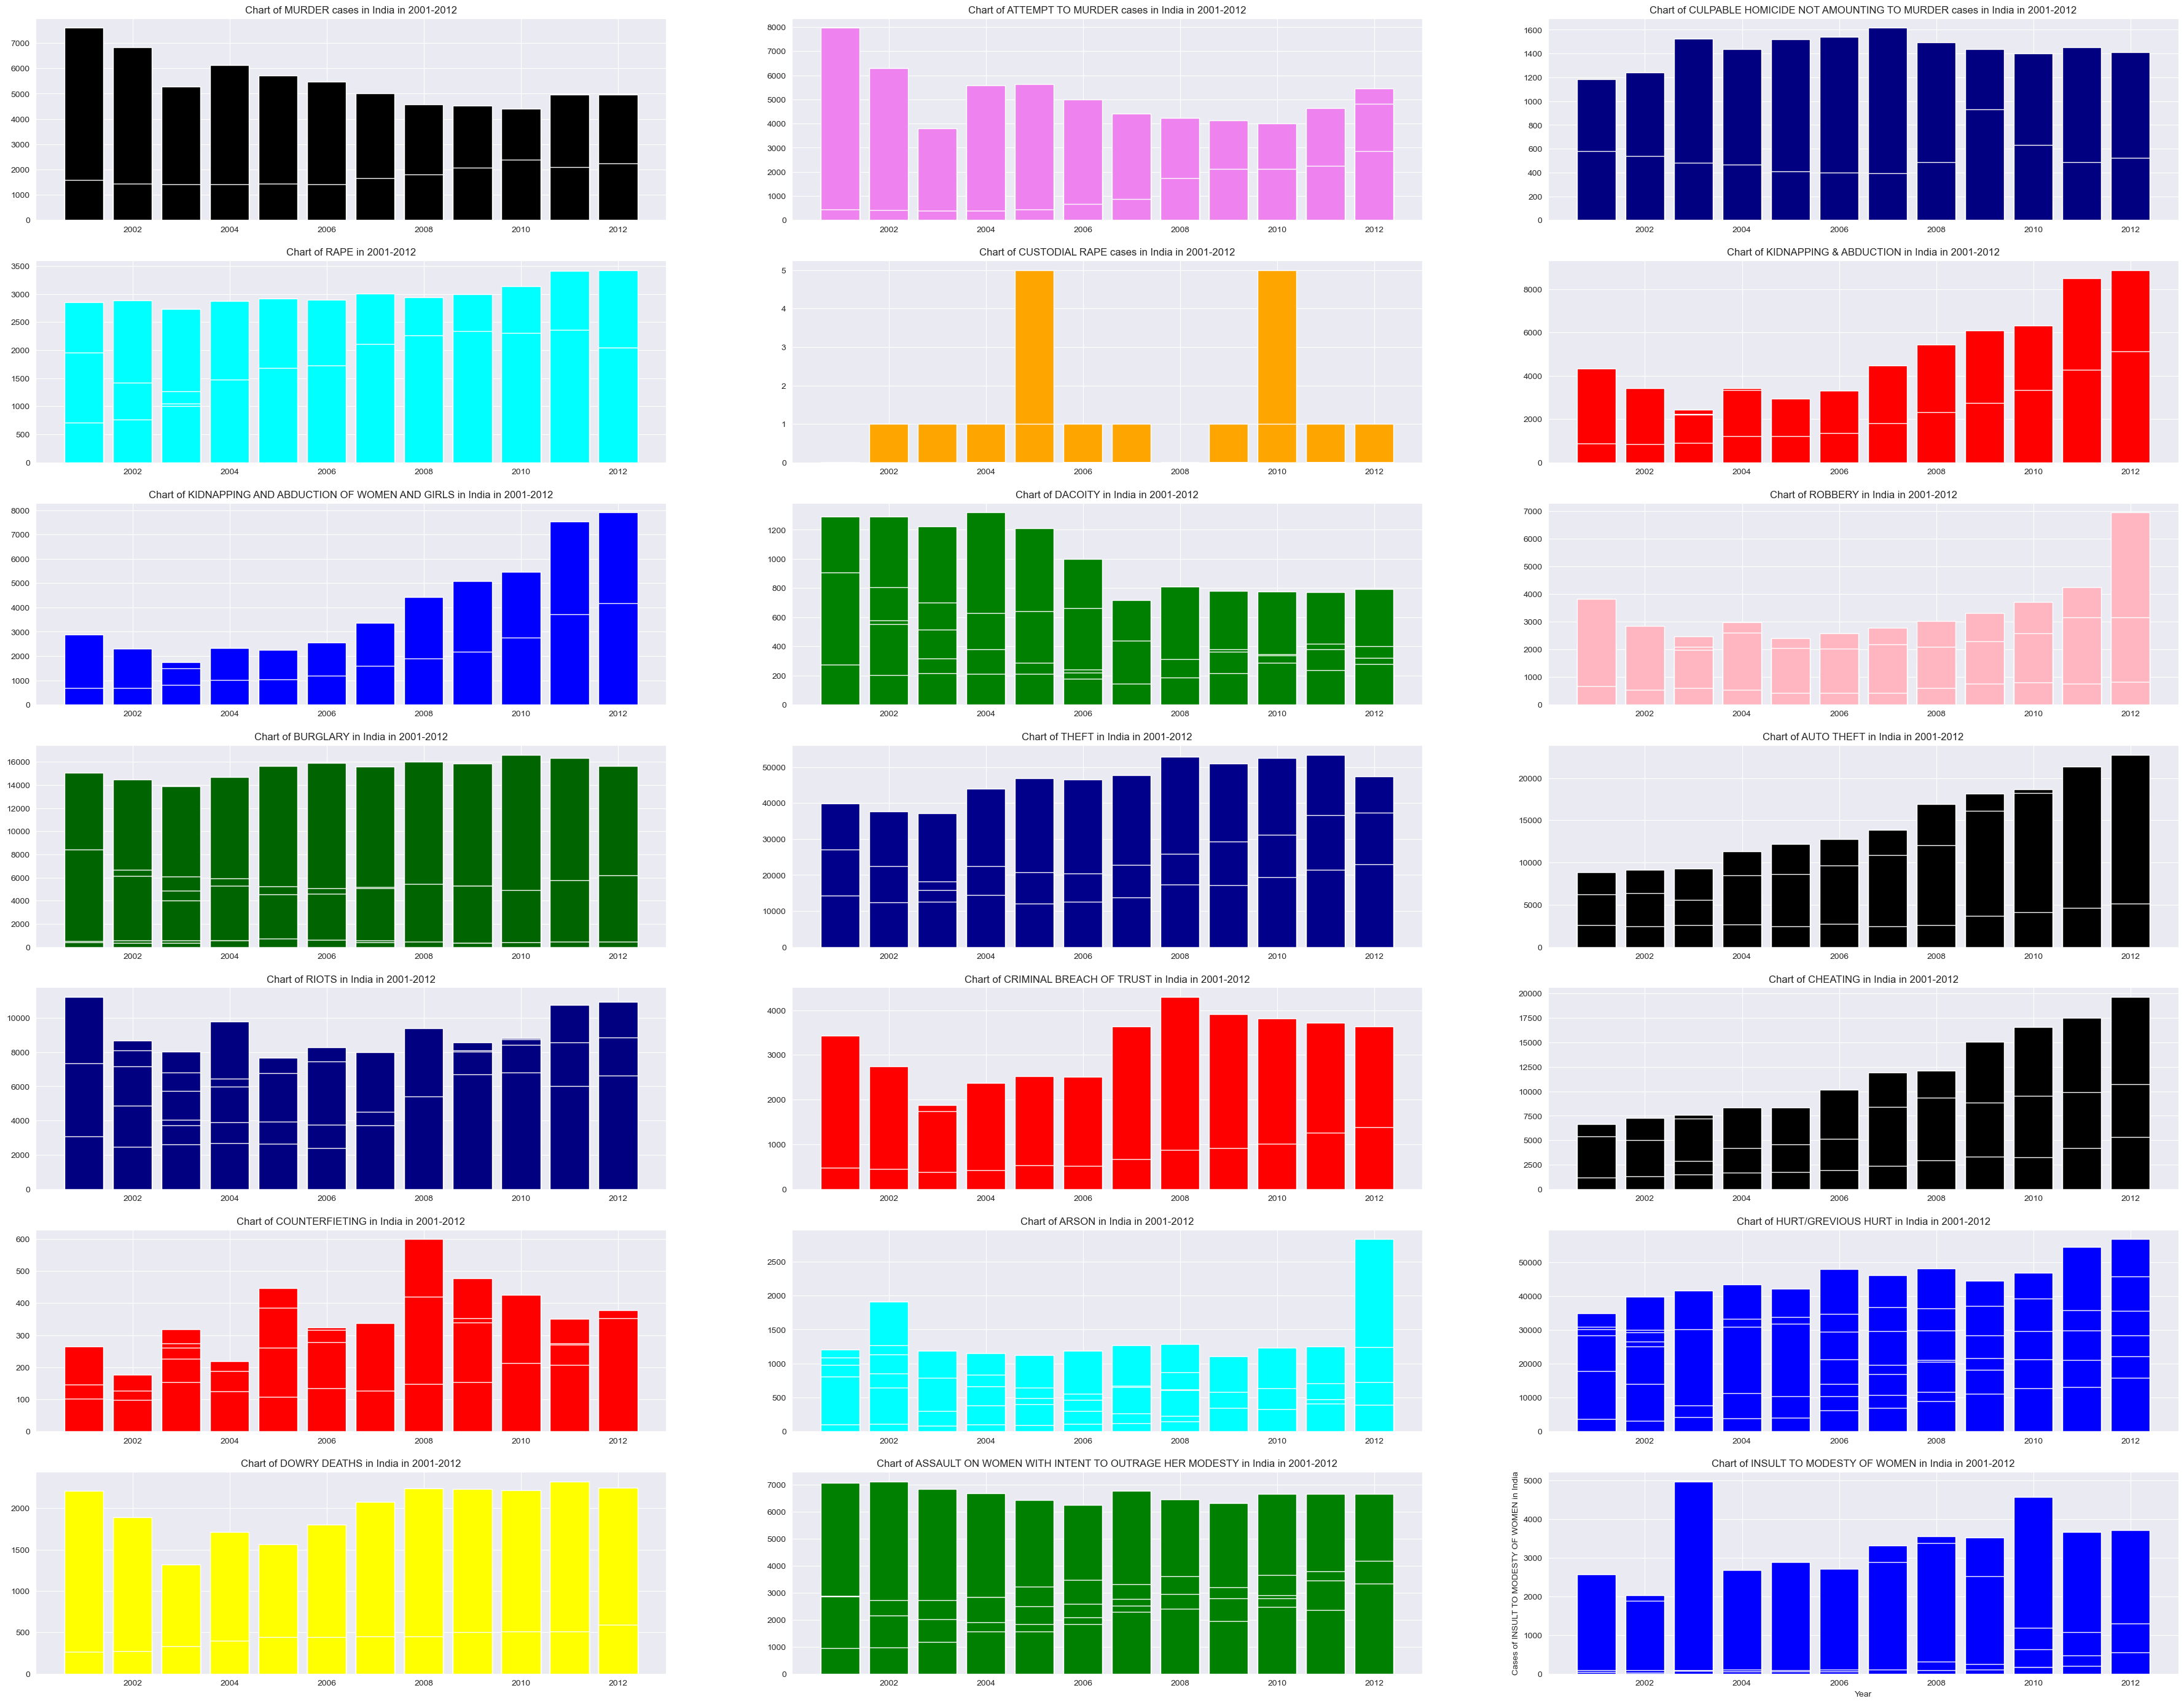

In [201]:
#Bar charts of every crime over time from the year 2001 to 2012 
fig, axes = plt.subplots(7, 3, figsize=(45, 35))

axes[0,0].set_title("Chart of MURDER cases in India in 2001-2012")
axes[0,0].bar(df['Year'], df['MURDER'], color = 'black');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of MURDER in India') #Y-axis

axes[0,1].set_title("Chart of ATTEMPT TO MURDER cases in India in 2001-2012")
axes[0,1].bar(df['Year'], df['ATTEMPT TO MURDER'], color = 'violet');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of ATTEMPT TO MURDER in India') #Y-axis

axes[0,2].set_title("Chart of CULPABLE HOMICIDE NOT AMOUNTING TO MURDER cases in India in 2001-2012")
axes[0,2].bar(df['Year'], df['CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'], color = 'navy');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of CULPABLE HOMICIDE NOT AMOUNTING TO MURDER in India') #Y-axis

axes[1,0].set_title("Chart of RAPE in 2001-2012")
axes[1,0].bar(df['Year'], df['RAPE'], color = 'cyan');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of RAPE in India') #Y-axis

axes[1,1].set_title("Chart of CUSTODIAL RAPE cases in India in 2001-2012")
axes[1,1].bar(df['Year'], df['CUSTODIAL RAPE'], color = 'orange');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of CUSTODIAL RAPE in India') #Y-axis

axes[1,2].set_title("Chart of KIDNAPPING & ABDUCTION in India in 2001-2012")
axes[1,2].bar(df['Year'], df['KIDNAPPING & ABDUCTION'], color = 'red');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of KIDNAPPING & ABDUCTION in India') #Y-axis

axes[2,0].set_title("Chart of KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS in India in 2001-2012")
axes[2,0].bar(df['Year'], df['KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'], color = 'blue');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS in India') #Y-axis


axes[2,1].set_title("Chart of DACOITY in India in 2001-2012")
axes[2,1].bar(df['Year'], df['DACOITY'], color = 'green');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of DACOITY in India') #Y-axis

axes[2,2].set_title("Chart of ROBBERY in India in 2001-2012")
axes[2,2].bar(df['Year'], df['ROBBERY'], color = 'lightpink');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of ROBBERY in India') #Y-axis

axes[3,0].set_title("Chart of BURGLARY in India in 2001-2012")
axes[3,0].bar(df['Year'], df['BURGLARY'], color = 'darkgreen');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of BURGLARY in India') #Y-axis


axes[3,1].set_title("Chart of THEFT in India in 2001-2012")
axes[3,1].bar(df['Year'], df['THEFT'], color = 'darkblue');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of THEFT in India') #Y-axis



axes[3,2].set_title("Chart of AUTO THEFT in India in 2001-2012")
axes[3,2].bar(df['Year'], df['AUTO THEFT'], color = 'black');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of AUTO THEFT in India') #Y-axis
axes[4,0].set_title("Chart of RIOTS in India in 2001-2012")
axes[4,0].bar(df['Year'], df['RIOTS'], color = 'navy');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of RIOTS') #Y-axis

axes[4,1].set_title("Chart of CRIMINAL BREACH OF TRUST in India in 2001-2012")
axes[4,1].bar(df['Year'], df['CRIMINAL BREACH OF TRUST'], color = 'red');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of CRIMINAL BREACH OF TRUST in India') #Y-axis


axes[4,2].set_title("Chart of CHEATING in India in 2001-2012")
axes[4,2].bar(df['Year'], df['CHEATING'], color = 'black');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of CHEATING in India') #Y-axis

axes[5,0].set_title("Chart of COUNTERFIETING in India in 2001-2012")
axes[5,0].bar(df['Year'], df['COUNTERFIETING'], color = 'red');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of COUNTERFIETING in India') #Y-axis

axes[5,1].set_title("Chart of ARSON in India in 2001-2012")
axes[5,1].bar(df['Year'], df['ARSON'], color = 'cyan');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of ARSON in India') #Y-axis

axes[5,2].set_title("Chart of HURT/GREVIOUS HURT in India in 2001-2012")
axes[5,2].bar(df['Year'], df['HURT/GREVIOUS HURT'], color = 'blue');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of HURT/GREVIOUS HURT in India') #Y-axis

axes[6,0].set_title("Chart of DOWRY DEATHS in India in 2001-2012")
axes[6,0].bar(df['Year'], df['DOWRY DEATHS'], color = 'yellow');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of DOWRY DEATHS in India') #Y-axis

axes[6,1].set_title("Chart of ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY in India in 2001-2012")
axes[6,1].bar(df['Year'], df['ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'], color = 'green');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY in India') #Y-axis

axes[6,2].set_title("Chart of INSULT TO MODESTY OF WOMEN in India in 2001-2012")
axes[6,2].bar(df['Year'], df['INSULT TO MODESTY OF WOMEN'], color = 'blue');
plt.xlabel('Year') #X-axis
plt.ylabel('Cases of INSULT TO MODESTY OF WOMEN in India') #Y-axis

#### Observations:
Cases of Murder , Attempt to Murder and Daocity has shown an decreasing trend over the year.

We can see that the number of cases of Rapes, kidnappings, Robbery,Auto Theft, Cheating, Grievious Hurt,Arson, has shown an increasing trend over the ,years.

Burglary,Dowry Deaths, Assault on women wth intent to outrage her modesty,Culpable Homicide not amounting to murder cases have remained the same and do not show any trend (upward or downward)

Custodial Rape shows few peaks like in year 2005 and 2010.Cunterfieting has no fix trend

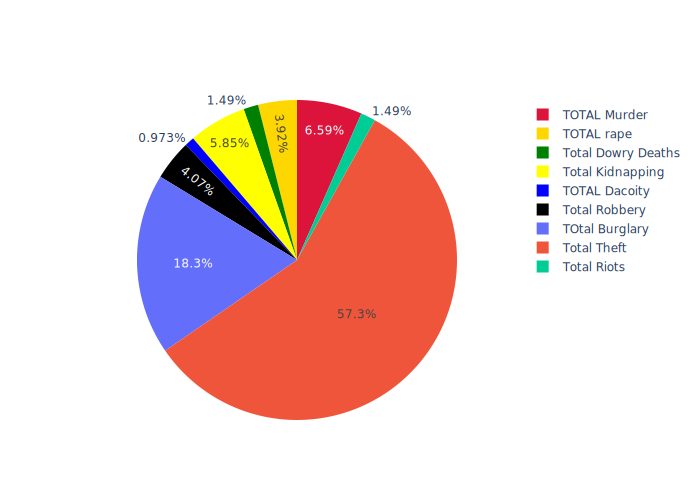

In [202]:
tot_murder= df['MURDER'].sum()
tot_rape= df['RAPE'].sum()
tot_dowrydeaths = df['DOWRY DEATHS'].sum()

tot_kidnap= df['KIDNAPPING & ABDUCTION'].sum()
tot_dacoity= df['DACOITY'].sum()
tot_robbery = df['ROBBERY'].sum()
tot_burglary= df['BURGLARY'].sum()
tot_theft= df['THEFT'].sum()
tot_riots = df['DOWRY DEATHS'].sum()

crime_group = ['TOTAL Murder','TOTAL rape','Total Dowry Deaths','Total Kidnapping','TOTAL Dacoity','Total Robbery','TOtal Burglary','Total Theft','Total Riots']
values = [tot_murder,tot_rape,tot_dowrydeaths,tot_kidnap,tot_dacoity,tot_robbery,tot_burglary,tot_theft,tot_riots]

colors = ['crimson','gold','green','yellow','blue','black']

fig = go.Figure(data=[go.Pie(labels=crime_group, values=values,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])

fig.show(renderer='svg')

As we see that Theft and Dacoity have the majority as they take 57.3 and 18.3 % in each state

### State/UT VS Literacy Rate

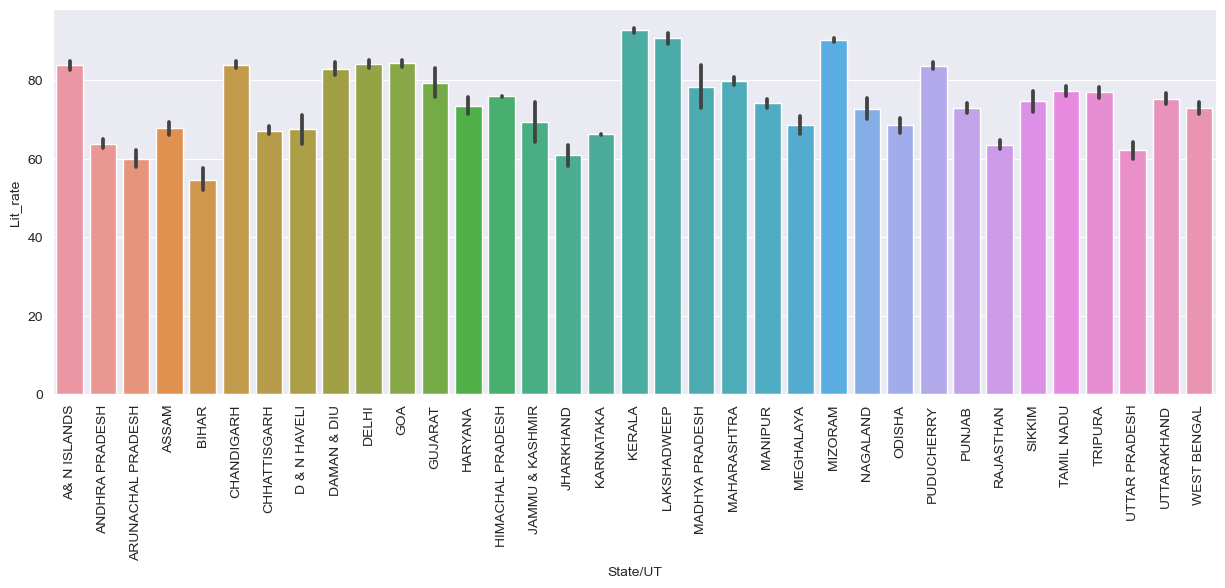

In [203]:
plt.figure(figsize=(15, 5))
sns.barplot(x='State/UT', y='Lit_rate',data=df)
plt.xticks(rotation='vertical')
plt.show()

has we see from the graph kerela and lakshwadeep has high literacy rate and the least literacy rate

### State/UT VS Total Crimes

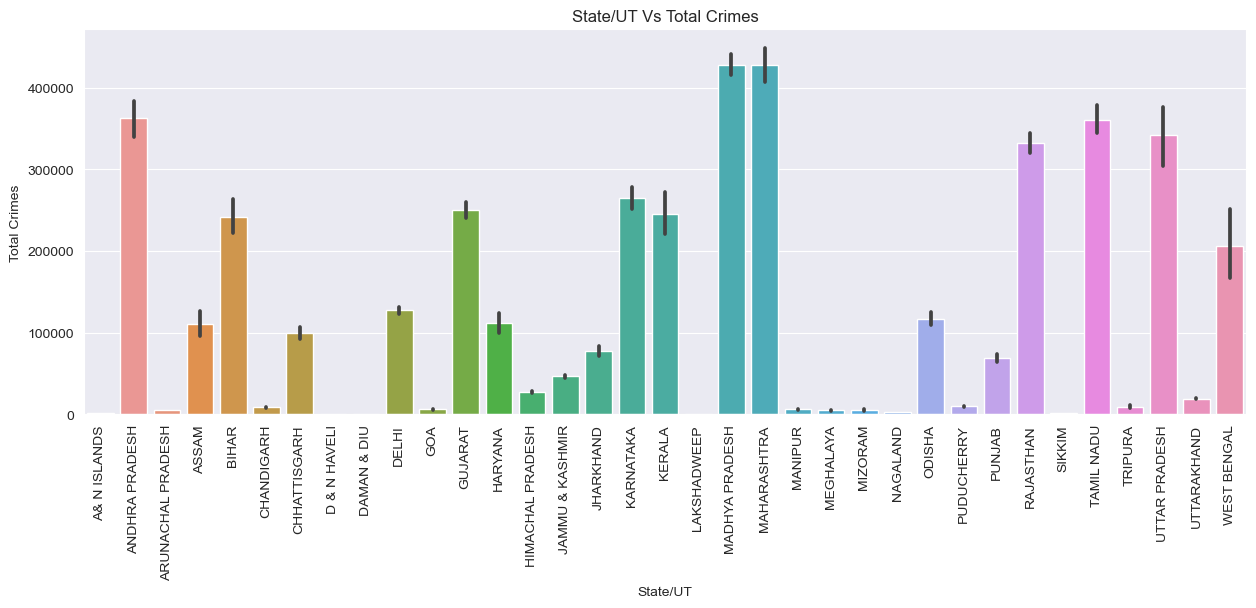

In [204]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['State/UT'], y=df['Total Crimes'])
plt.xticks(rotation='vertical')
plt.title('State/UT Vs Total Crimes')
plt.show()

In [205]:
df['Total Crimes'].values.max()

472008

### The maximum Crime Value in Madhaypradesha and Maharastra is 472008 

as we see that Madhyapradesh, Maharastra, Andrapradesh Uttarpradesh, Tamil Nadu and all have highest Crimes.

#### Year Vs Total Crimes

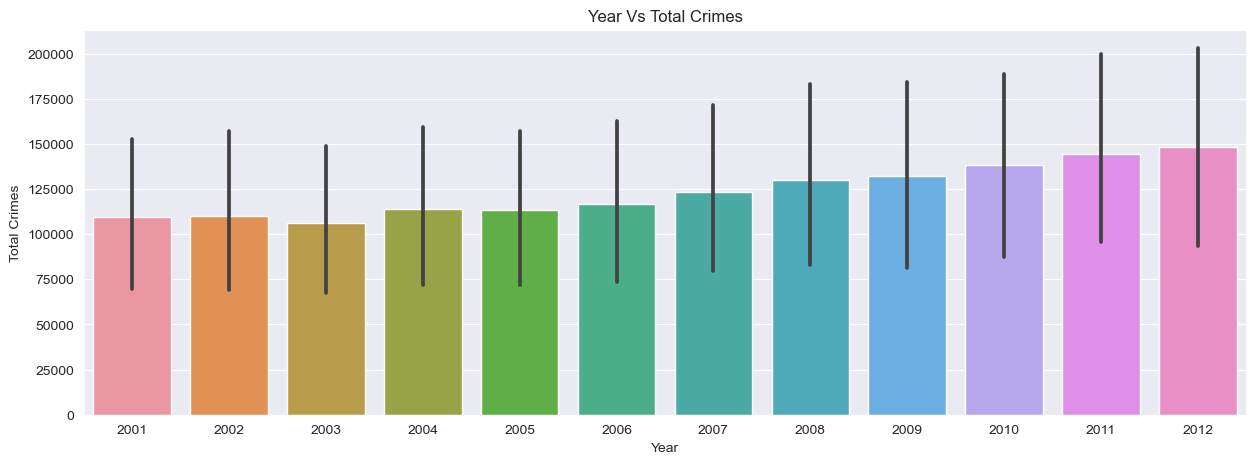

In [206]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['Year'], y=df['Total Crimes'])
plt.title('Year Vs Total Crimes')
plt.show()

#### As we see that as the years are increasing the Total Crimes are also increasing 

### State/UT VS Total Crimes Aginst SCs

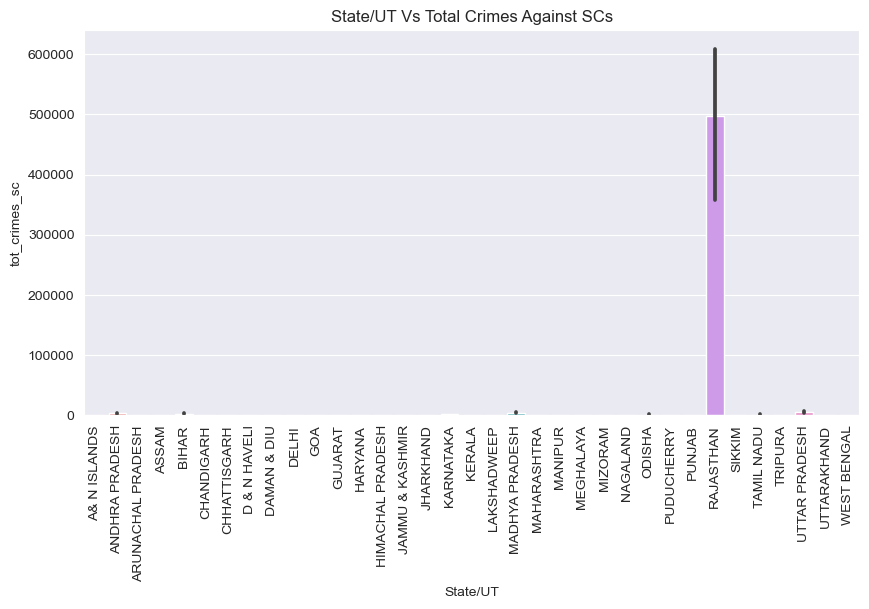

In [207]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['State/UT'], y=df['tot_crimes_sc'])
plt.xticks(rotation='vertical')
plt.title('State/UT Vs Total Crimes Against SCs')
plt.show()

#### As we see that only Rajasthan State has the Total crimes against Scs

### State/UT Vs Total Crimes against STs

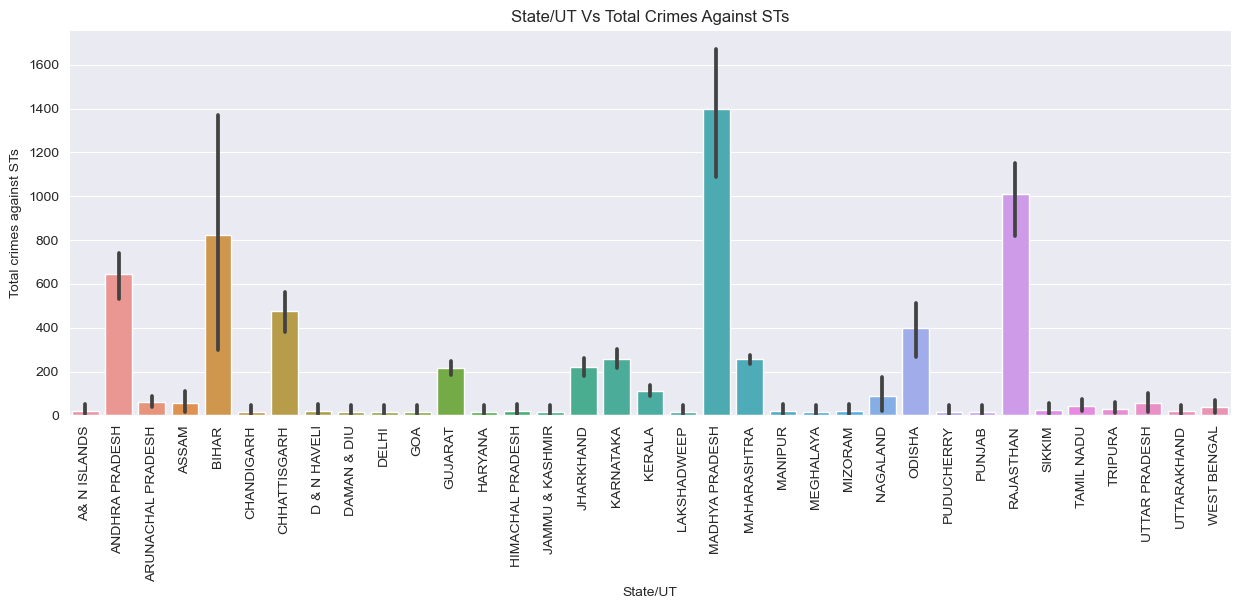

In [208]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['State/UT'], y=df['Total crimes against STs'])
plt.xticks(rotation='vertical')
plt.title('State/UT Vs Total Crimes Against STs')
plt.show()

### From all the other states Madhyapradesh State has the Highest Total Crimes against Sts

### State/UT Vs Total Crimes Against Children

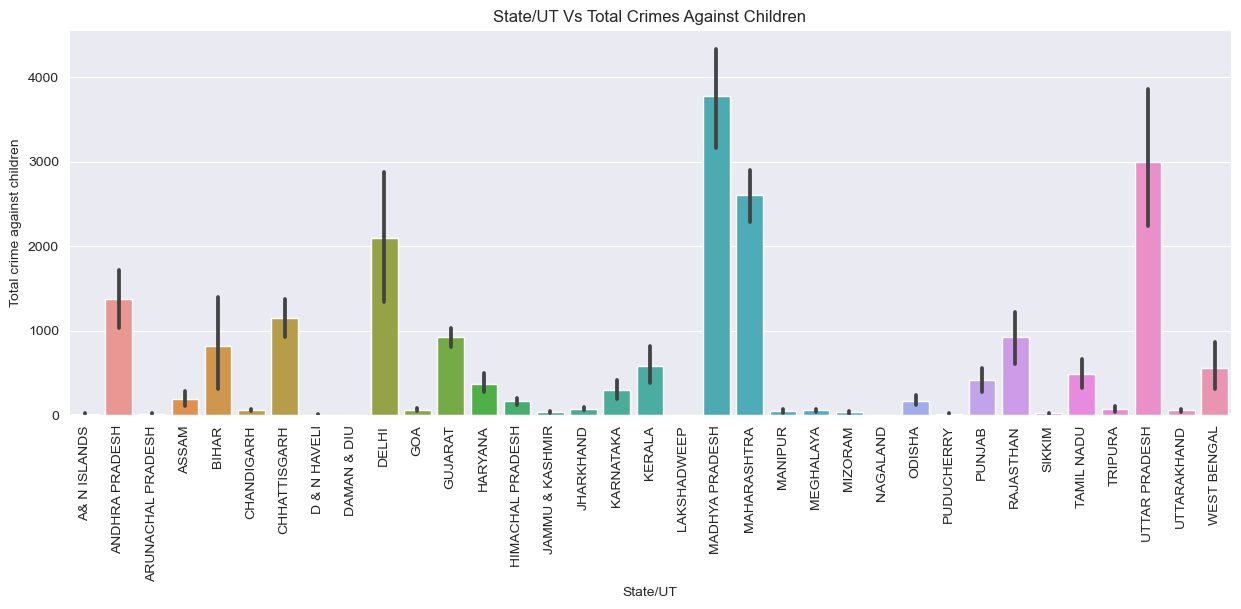

In [209]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['State/UT'], y=df['Total crime against children'])
plt.xticks(rotation='vertical')
plt.title('State/UT Vs Total Crimes Against Children')
plt.show()

#### As we see that the highest Total crimes against the childrens, MAdhyapdradesh,UttarPradesh as the maximum

### State/UT Vs Total Crime against Women

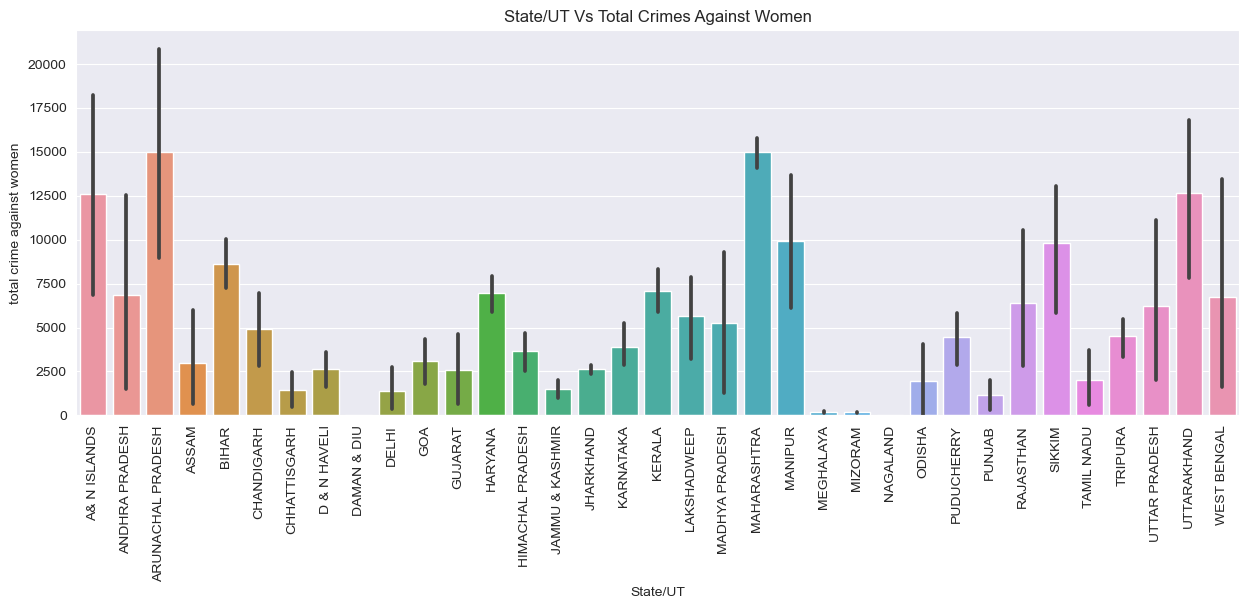

In [210]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df['State/UT'], y=df['total crime against women'])
plt.xticks(rotation='vertical')
plt.title('State/UT Vs Total Crimes Against Women')
plt.show()

#### Arunachal Pradesh and Maharastra have the highest Total crimes agaist Womens and Mizoram and Meghalaya have the least

In [211]:
crime_df=df[['Year','Lit_rate', 'Total Crimes', 'tot_crimes_sc', 'total crime against women',
       'Total crimes against STs','Total crime against children']]

In [212]:
crime_df.corr()

Year  Lit_rate  Total Crimes  tot_crimes_sc  \
Year                          1.000000  0.314890      0.094007       0.048076   
Lit_rate                      0.314890  1.000000     -0.167573      -0.163993   
Total Crimes                  0.094007 -0.167573      1.000000       0.242294   
tot_crimes_sc                 0.048076 -0.163993      0.242294       1.000000   
total crime against women     0.150851 -0.011096      0.155126       0.035324   
Total crimes against STs      0.060426 -0.253828      0.547101       0.359817   
Total crime against children  0.229476  0.014062      0.728111       0.084627   

                              total crime against women  \
Year                                           0.150851   
Lit_rate                                      -0.011096   
Total Crimes                                   0.155126   
tot_crimes_sc                                  0.035324   
total crime against women                      1.000000   
Total crimes against STs                       0.095342   
Total crime against children                   0.176379   

                              Total crimes against STs  \
Year                                          0.060426   
Lit_rate                                     -0.253828   
Total Crimes                                  0.547101   
tot_crimes_sc                                 0.359817   
total crime against women                     0.095342   
Total crimes against STs                      1.000000   
Total crime against children                  0.484496   

                              Total crime against children  
Year                                              0.229476  
Lit_rate                                          0.014062  
Total Crimes                                      0.728111  
tot_crimes_sc                                     0.084627  
total crime against women                         0.176379  
Total crimes against STs                          0.484496  
Total crime against children                      1.000000

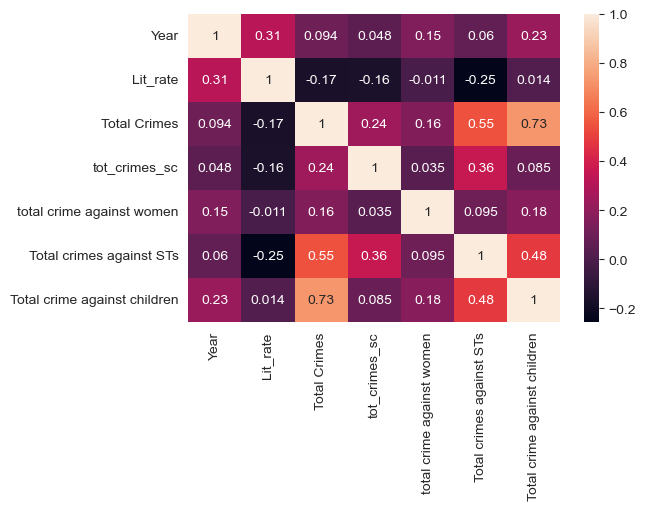

In [213]:
plt.figure(figsize=(6,4))
sns.heatmap(crime_df.corr(),annot=True)
plt.show()

### As literacy rates go up, total crimes against STs tend to go down.

## 2.1 Analysis of Literacy Rate vs Total Crimes.

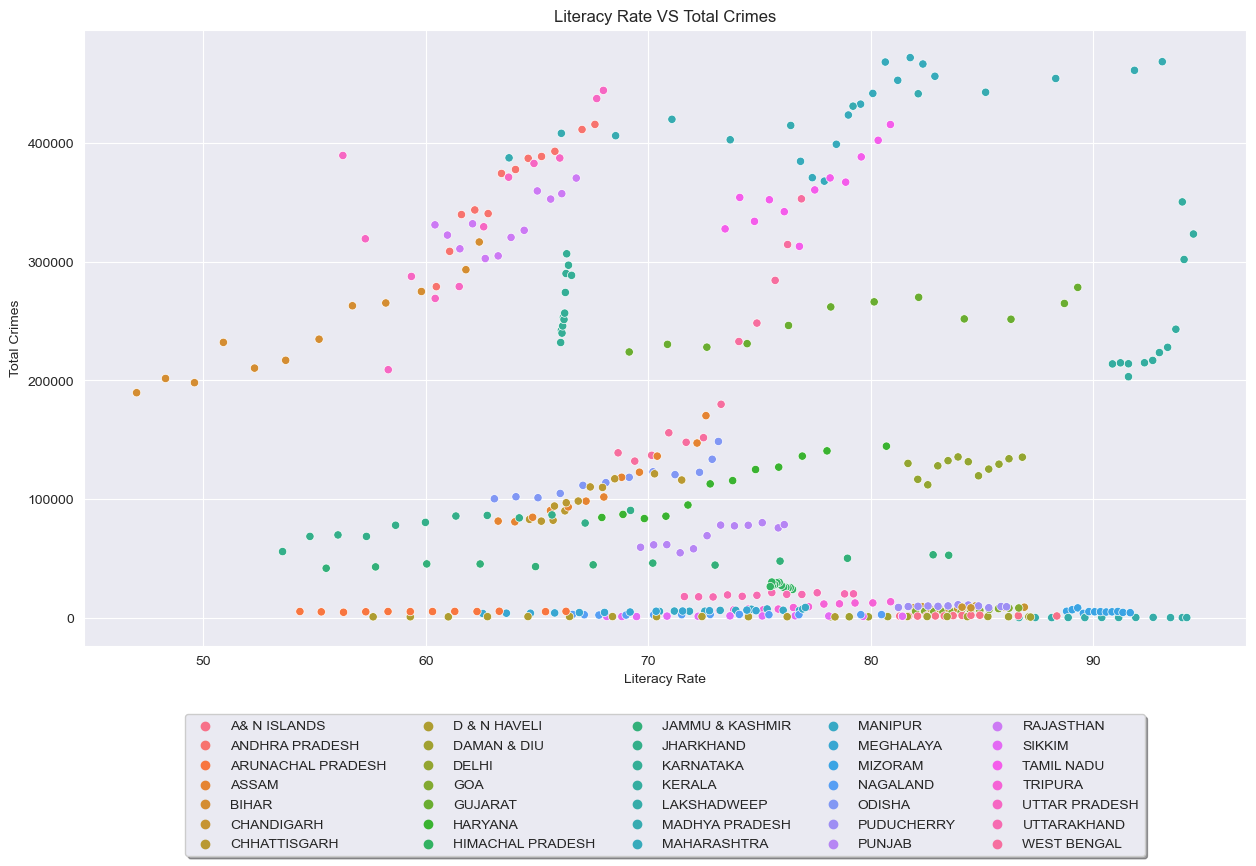

In [214]:
#plotting scatter plot
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['Lit_rate'], y=df['Total Crimes'],hue=df['State/UT'])
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes')
plt.title('Literacy Rate VS Total Crimes')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=5)
plt.show()

As we from the above data we come to know that higher the literacy rate less is the total crimes

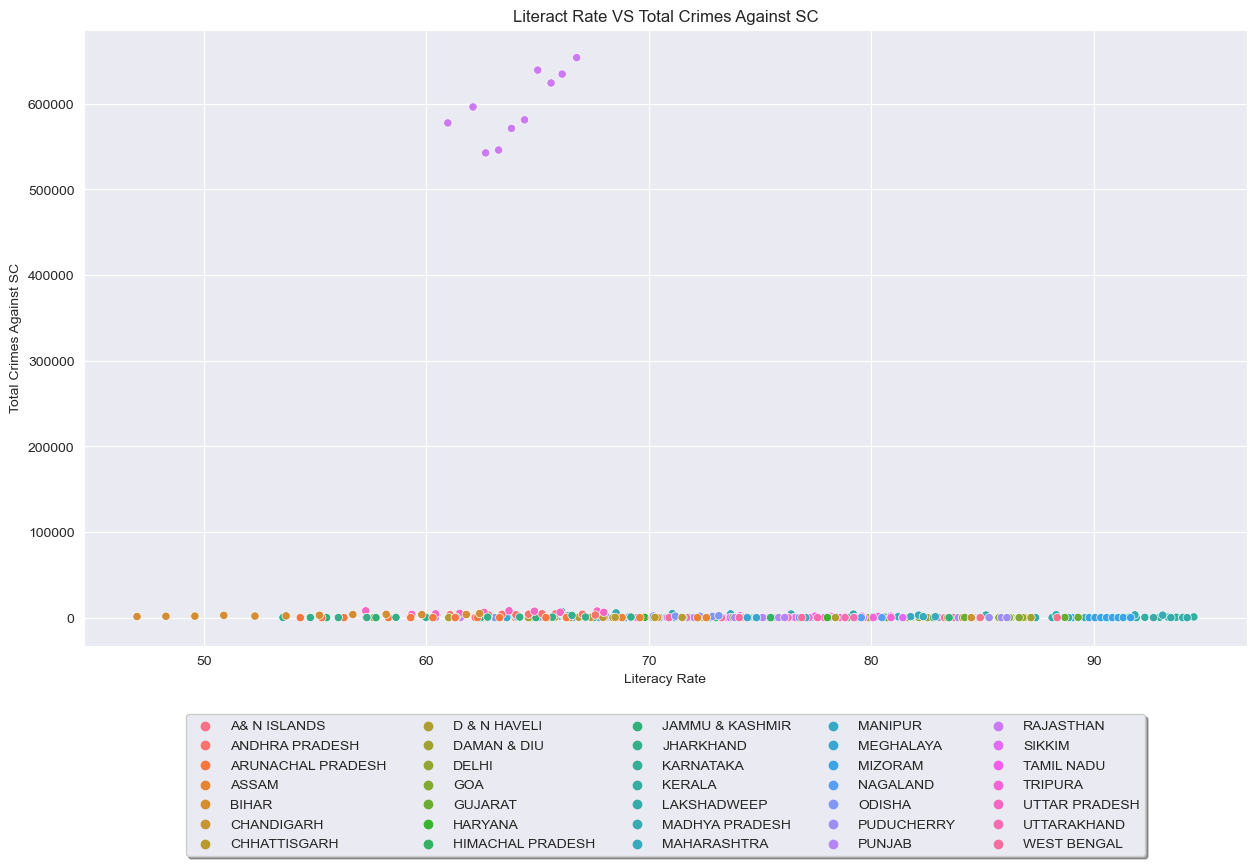

In [215]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['Lit_rate'], y=df['tot_crimes_sc'],hue=df['State/UT'])
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes Against SC')
plt.title('Literact Rate VS Total Crimes Against SC')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=5)
plt.show()

### Higher literacy rates might be linked to a decrease in total crimes. 

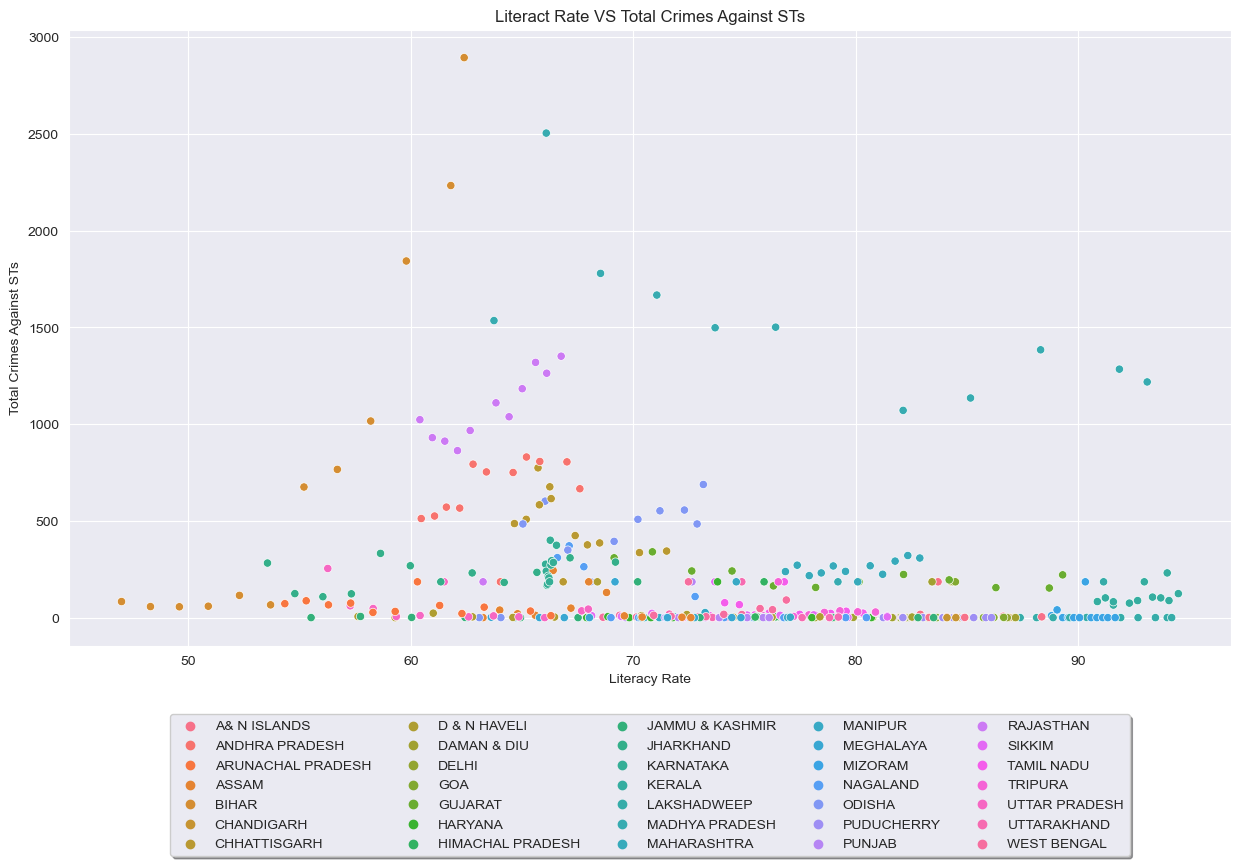

In [216]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['Lit_rate'], y=df['Total crimes against STs'],hue=df['State/UT'])
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes Against STs')
plt.title('Literact Rate VS Total Crimes Against STs')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=5)
plt.show()

### This scatterplot suggests a possible trend. As literacy rates go up, the total number of crimes seems to go down. In other words, higher literacy rates might be associated with a decrease in crime.

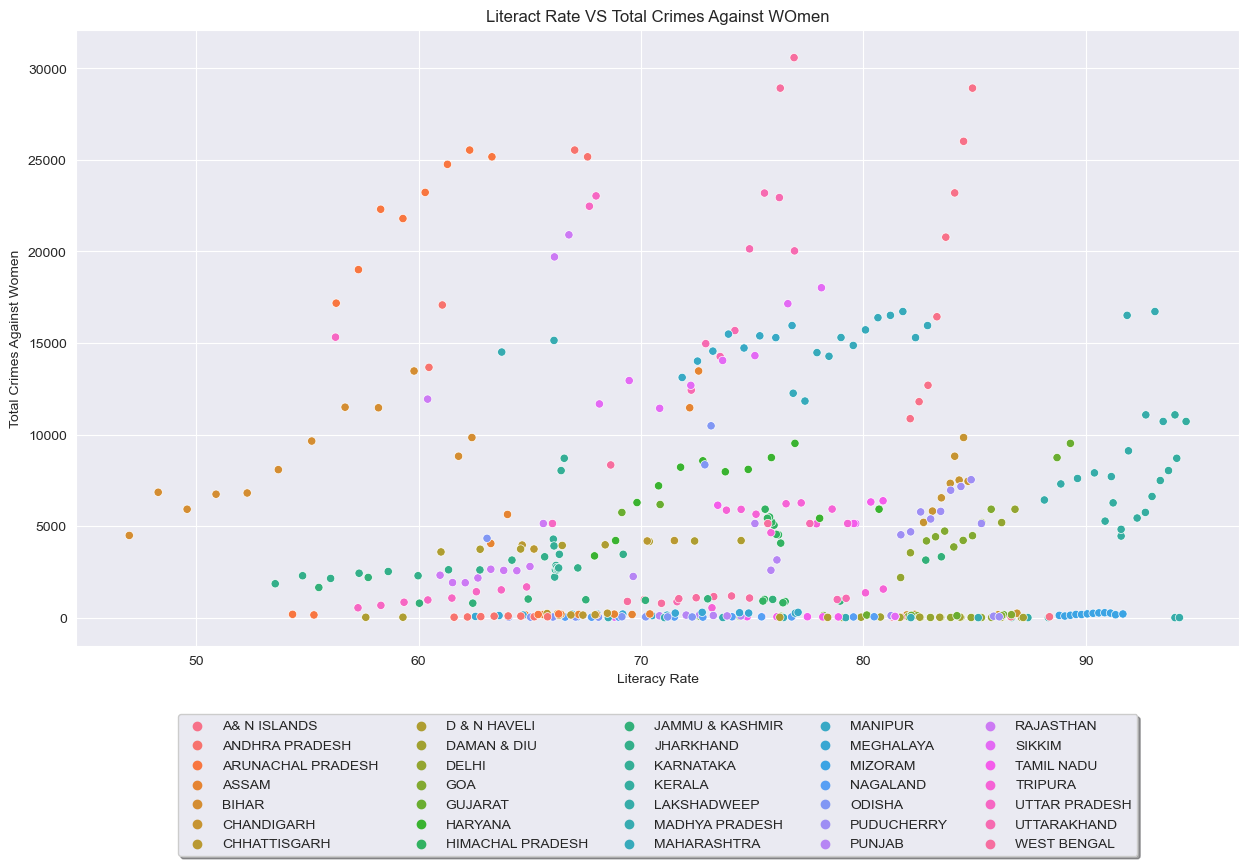

In [217]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['Lit_rate'], y=df['total crime against women'],hue=df['State/UT'])
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes Against Women')
plt.title('Literact Rate VS Total Crimes Against WOmen')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=5)
plt.show()

### This suggests a possible connection between literacy rates and crimes against women. In the past, when literacy rates were low, crimes against women may have been more frequent. However, as literacy rates have increased, there might be a decrease in these crimes.

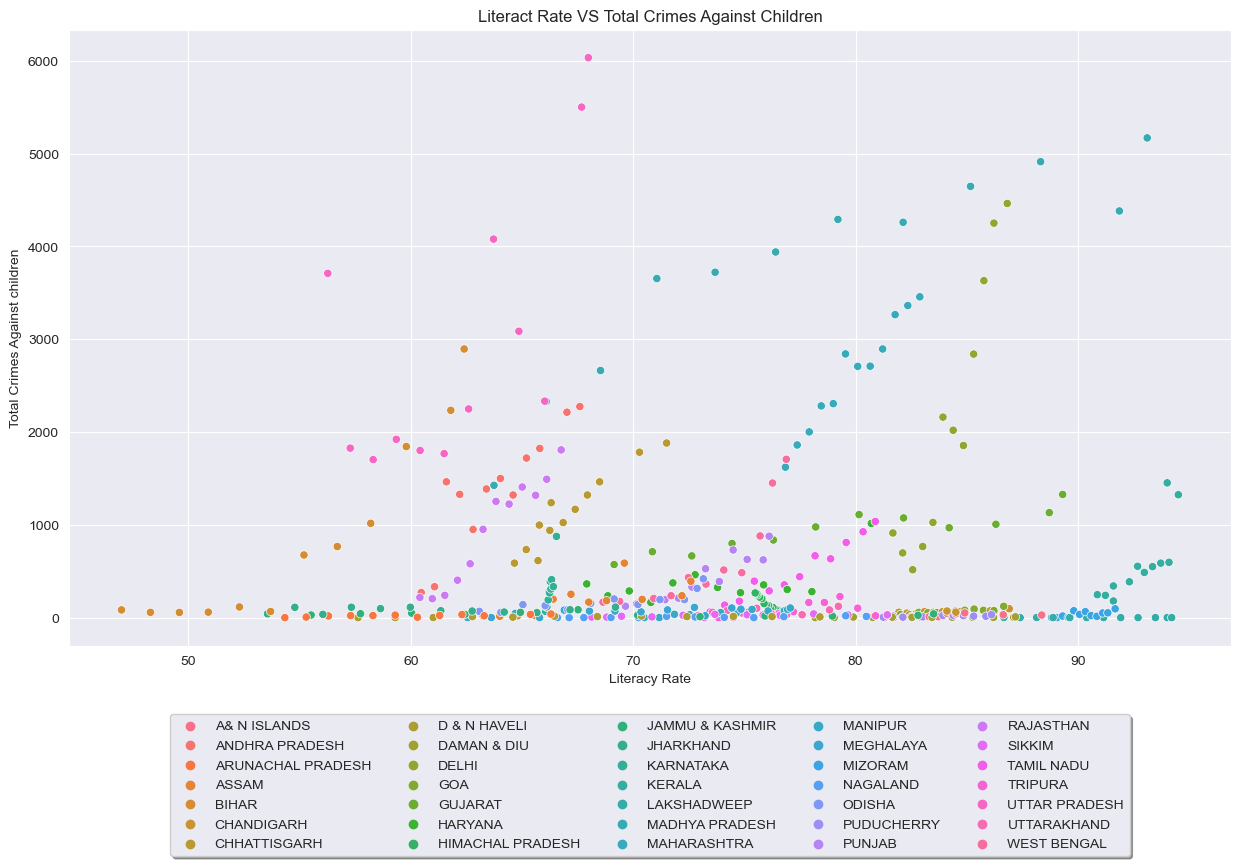

In [218]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x=df['Lit_rate'], y=df['Total crime against children'],hue=df['State/UT'])
plt.xlabel('Literacy Rate')
plt.ylabel('Total Crimes Against children')
plt.title('Literact Rate VS Total Crimes Against Children')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=5)
plt.show()

### Higher literacy rates are associated with fewer total crimes against children.

## 2.2 Analysis of the type of crime vs each state vs Literacy rate.

#### State Vs MURDER Vs Litercay Rate

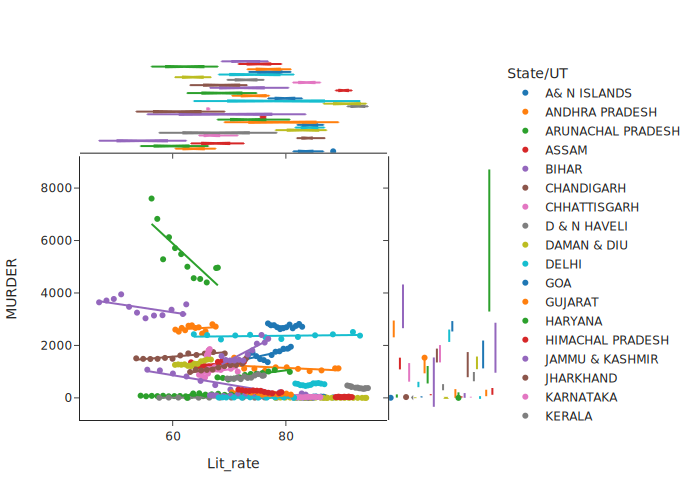

In [219]:
fig = px.scatter(df, x="Lit_rate", y="MURDER", color="State/UT", marginal_y="violin",
           marginal_x="box",  trendline='ols',template="simple_white")
fig.show(renderer='svg')

#### The analysis reveals a negative correlation between a state's literacy rate and the number of murder cases. In other words, states with higher literacy rates tend to have fewer murders.

### EACH STATE VS LIT RATE VS ATTEMT TO MURDER CRIME

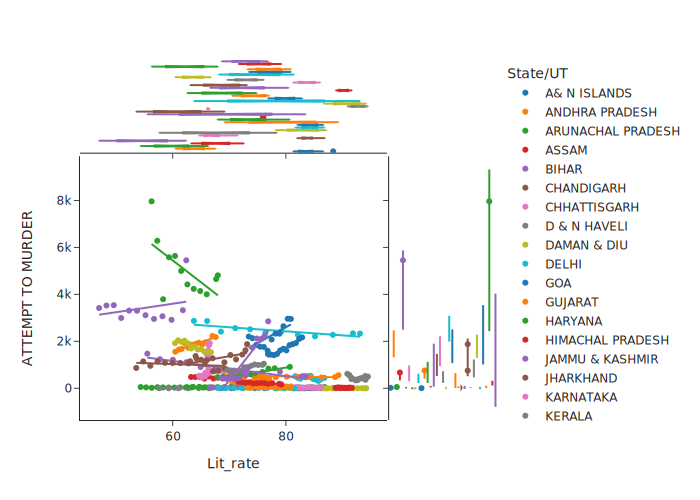

In [220]:
fig = px.scatter(df, x="Lit_rate", y="ATTEMPT TO MURDER", color="State/UT", marginal_y="violin",
           marginal_x="box",  trendline='ols',template="simple_white")
fig.show(renderer='svg')

### EACH State VS RAPE VS Lit_rate

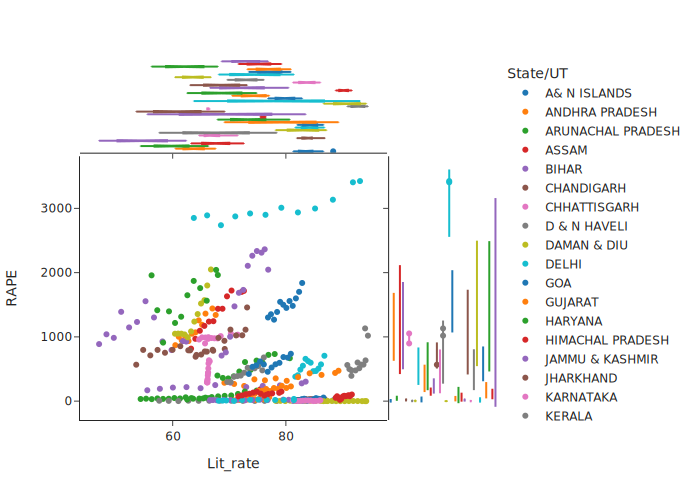

In [221]:
fig = px.scatter(df, x="Lit_rate", y="RAPE", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

#### Madhya Pradesh has the highest rate of reported rape cases, compared to Lakshadweep with the lowest rate.

### EACH State VS CULPABLE HOMICIDE NOT AMOUNTING TO MURDER VS Lit_rate

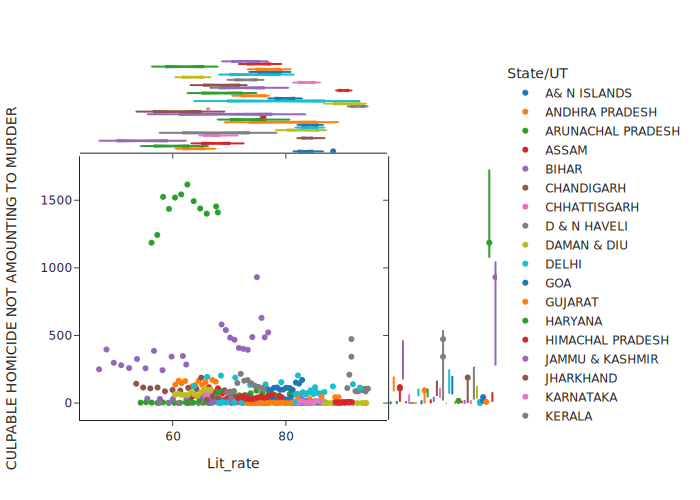

In [222]:
fig = px.scatter(df, x="Lit_rate", y="CULPABLE HOMICIDE NOT AMOUNTING TO MURDER", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

#### Uttar Pradesh stands out with a significantly higher number of culpable homicide cases (not amounting to murder) at around 1418, compared to states like Andhra Pradesh, Tripura, Sikkim, and Lakshadweep which have much fewer cases, ranging from 3 to 6

### Each state VS Lit rate VS Type of CRIME(CUSTODIAL RAPE)

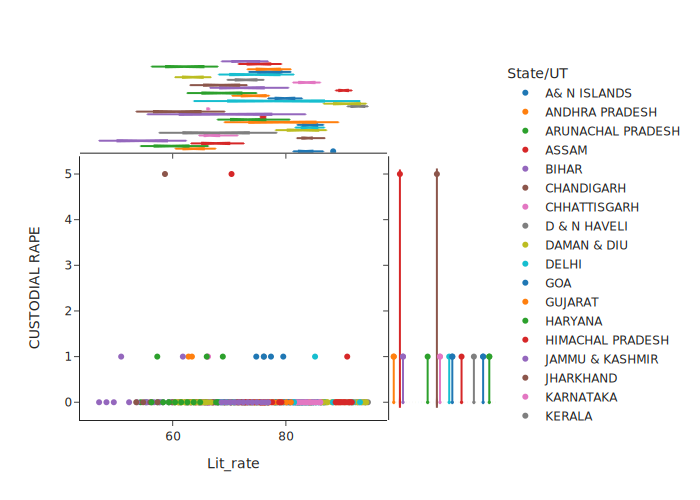

In [223]:
fig = px.scatter(df, x="Lit_rate", y="CUSTODIAL RAPE", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

#### Custodial rape occurs when someone in a position of authority, like a public servant, sexually assaults another person who is under their custody or care, typically within a designated facility.

#### Assam, with a literacy rate of 70%, had five reported cases of custodial rape, the highest in this category and Kerala, with an impressive 94% literacy rate, has reported zero cases of custodial rape.

### Each State VS Lit Rate VS Type of crime(KIDNAPPING & ABDUCTION)

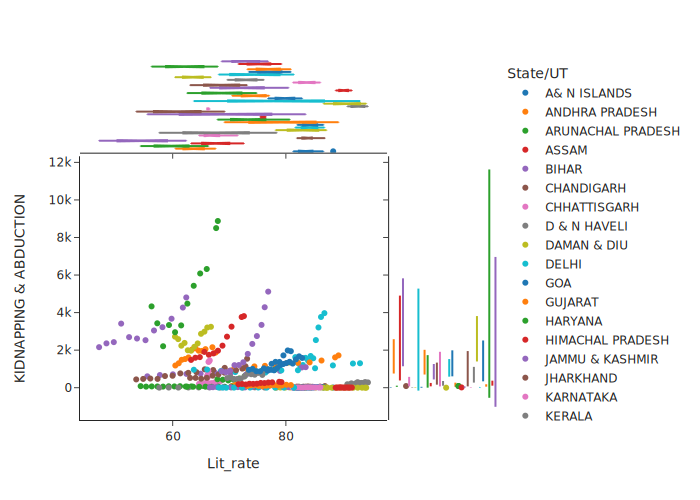

In [224]:
fig = px.scatter(df, x="Lit_rate", y="KIDNAPPING & ABDUCTION", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

#### Uttar Pradesh, West Bengal, and Bihar have the highest number of kidnapping and abduction cases in India.

### Each state vs Lit rate VS type of Crime(KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS)

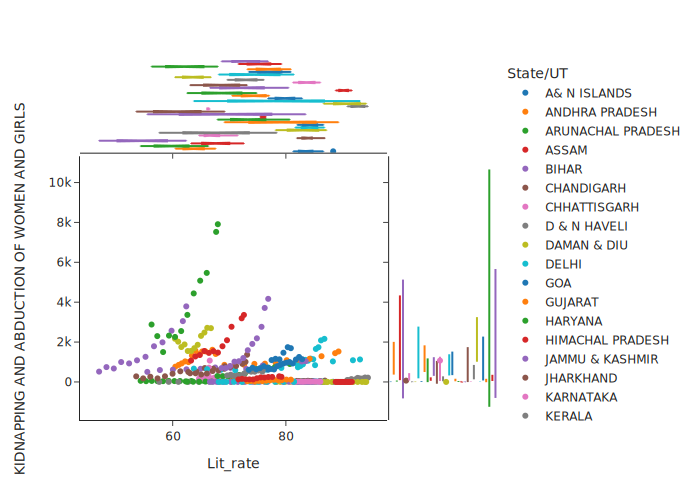

In [225]:
fig = px.scatter(df, x="Lit_rate", y="KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

#### Uttar Pradesh has a disturbingly high number of kidnapping and abduction cases involving women and girls (7910), while Lakshadweep has reported none.

#### Each state vs Lit rate VS type of crime(DACOITY)

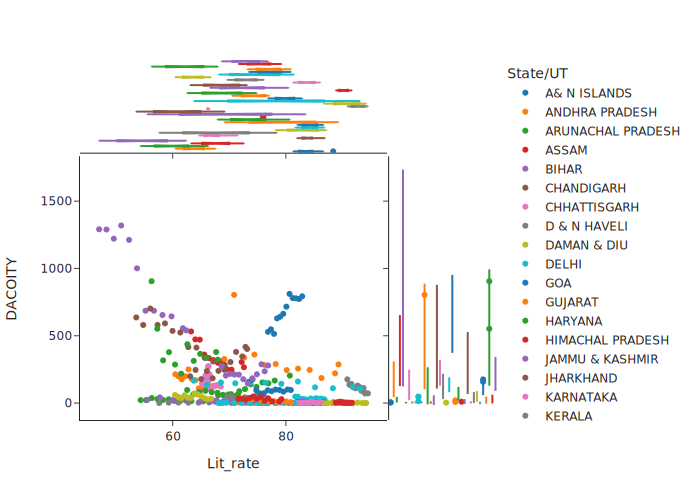

In [226]:
fig = px.scatter(df, x="Lit_rate", y="DACOITY", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

#### Bihar, Uttar Pradesh, and Maharashtra have the most dacoity cases in India, while Tripura, Sikkim, and Manipur have the fewest.

### Each state VS Lit rate VS Type of Crime(ROBBERY)

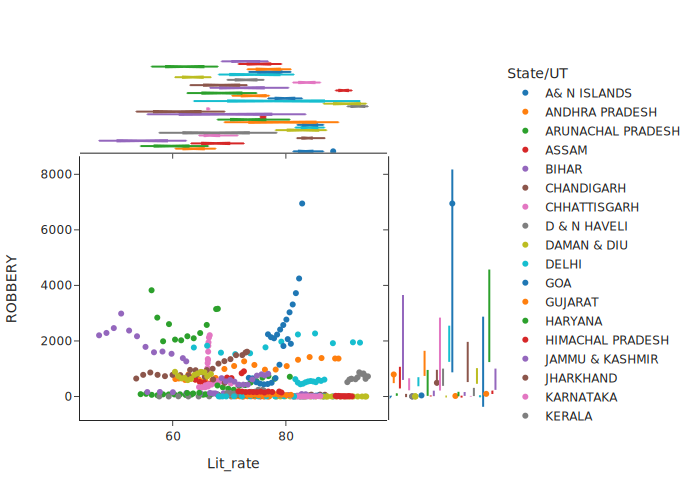

In [227]:
fig = px.scatter(df, x="Lit_rate", y="ROBBERY", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

#### Maharashtra has a significantly higher number of robbery cases (6949) compared to Lakshadweep, which has reported none.

### Each state VS Lit Rate VS Type of Crime(BURGLARY)

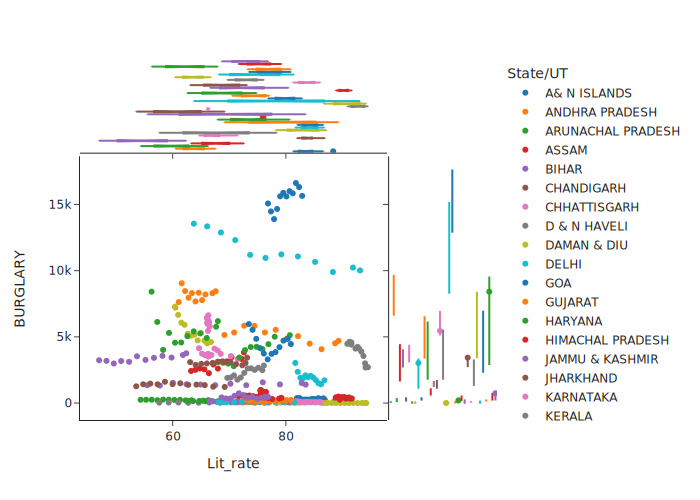

In [228]:
fig = px.scatter(df, x="Lit_rate", y="BURGLARY", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

#### Maharashta has around 15000 cases of BURGLARY and Lakshdweep has 3 BURGLARY cases

### Each State VS Lit rate VS Type of Crime(THEFT)

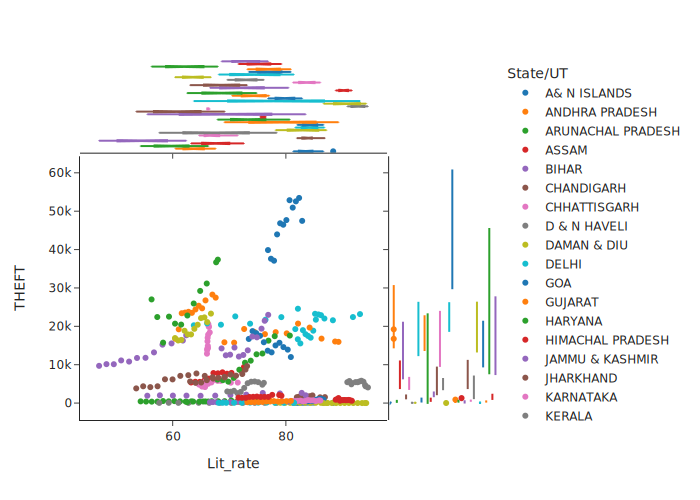

In [229]:
fig = px.scatter(df, x="Lit_rate", y="THEFT", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

 Maharashtra has around 50K (highest)cases of THEFT and Lakshdweep has 7(Lowest) cases of THEFT.

### Each State VSLit rate VS Type of Crime(AUTO THEFT)

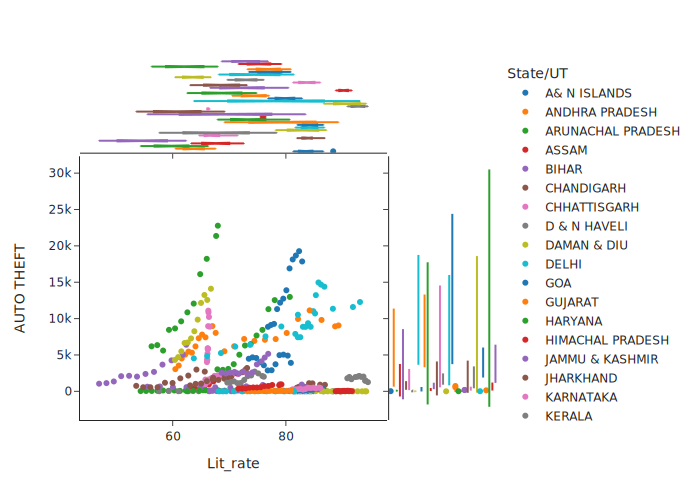

In [230]:
fig = px.scatter(df, x="Lit_rate", y="AUTO THEFT", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

#### Uttar Pradesh has a staggering number of auto theft cases (22,000), the highest in the country. In stark contrast, Lakshadweep has only 1 reported case, the lowest.

#### Each state VS Lit rate VS Type of Crime(RIOTS)

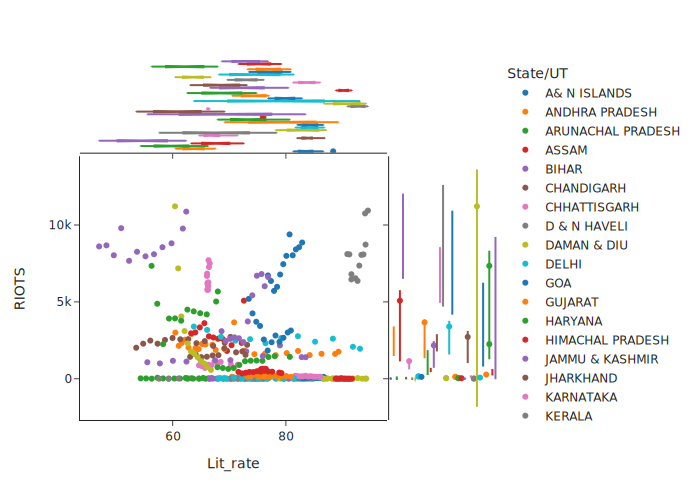

In [231]:
fig = px.scatter(df, x="Lit_rate", y="RIOTS", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

#### Each State VS Litracy Rate VS Type of Crime(CRIMINAL BREACH OF TRUST)

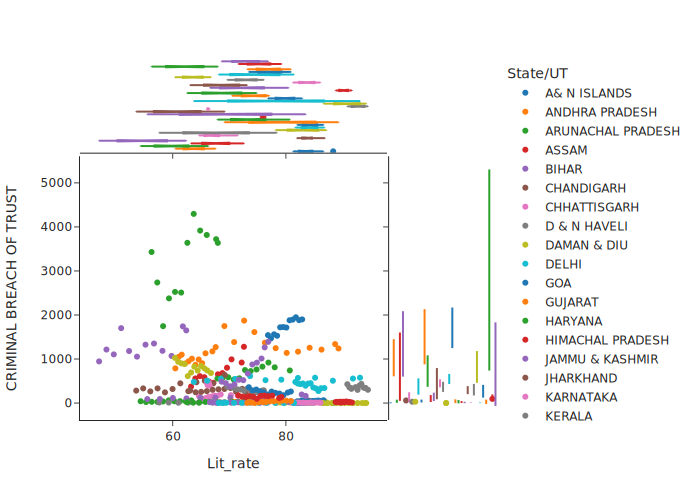

In [232]:
fig = px.scatter(df, x="Lit_rate", y="CRIMINAL BREACH OF TRUST", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

#### Uttar Pradesh has a disturbingly high number of criminal breach of trust cases (around 4296), the most in the country, while Lakshadweep has reported none.

### Each State VS Lit rate VS Type of Crime(CHEATING)

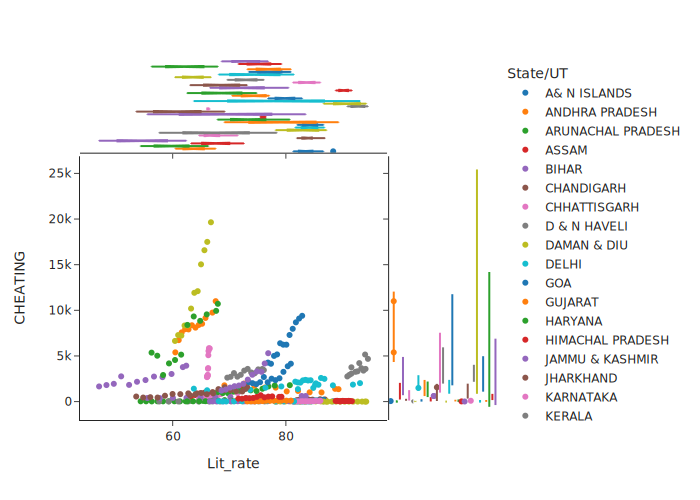

In [233]:
fig = px.scatter(df, x="Lit_rate", y="CHEATING", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

#### Rajasthan has a staggering number of cheating cases (19,460), the highest in the country. Lakshdweep, on the other hand, has reported zero cases, the lowest.

### Each state VS Lit rate vs Type of Crime(COUNTERFIETING)

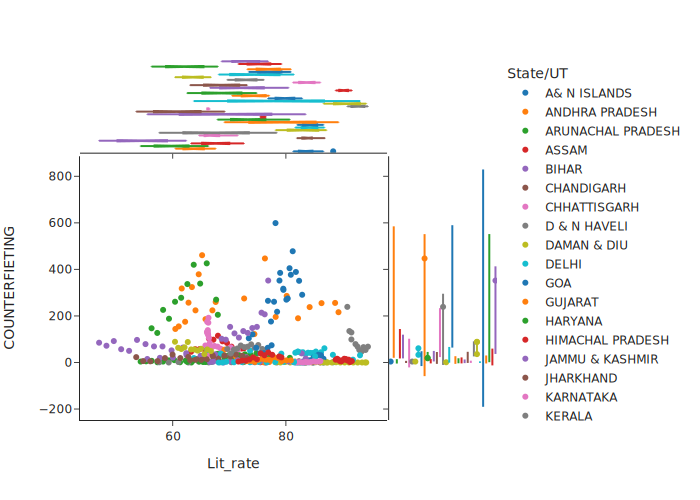

In [234]:
fig = px.scatter(df, x="Lit_rate", y="COUNTERFIETING", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

#### Tamil Nadu has the most reported counterfeiting cases in the country, with 599, compared to Lakshadweep which has none

### Each state VS Lit rate vs Type of Crime(ARSON)

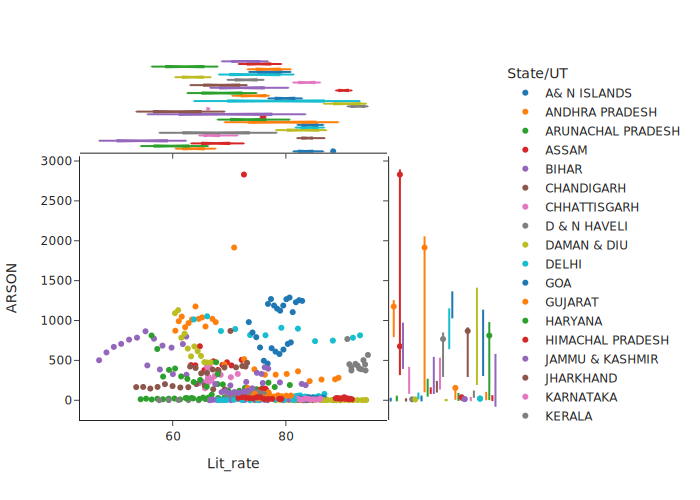

In [235]:
fig = px.scatter(df, x="Lit_rate", y="ARSON", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

#### State Assam has highest numbers of ARSON cases 2830 and Lkshdweep has 3 ARSON cases

### Each state VS Lit rate vs Type of Crime(HURT/GREVIOUS HURT)

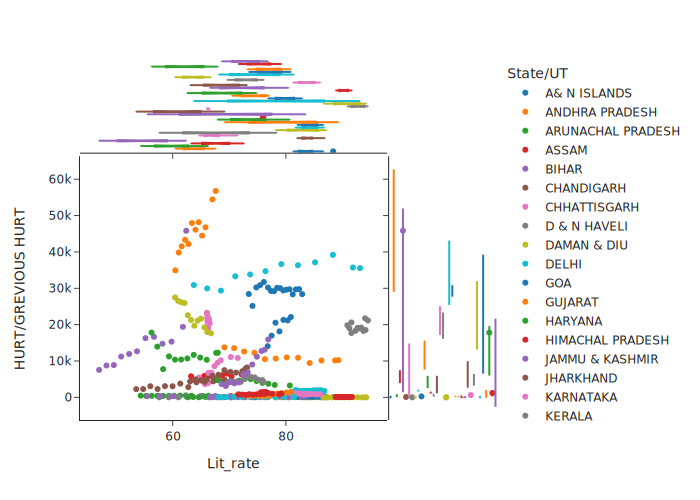

In [236]:
fig = px.scatter(df, x="Lit_rate", y="HURT/GREVIOUS HURT", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

#### Tamil Nadu has a significantly higher number of cases involving hurt or grievous hurt (56,700), the most in the country. Lakshadweep has a very low number, with only 1 reported case.

### Each state VS Lit rate vs Type of Crime(DOWRY DEATHS)

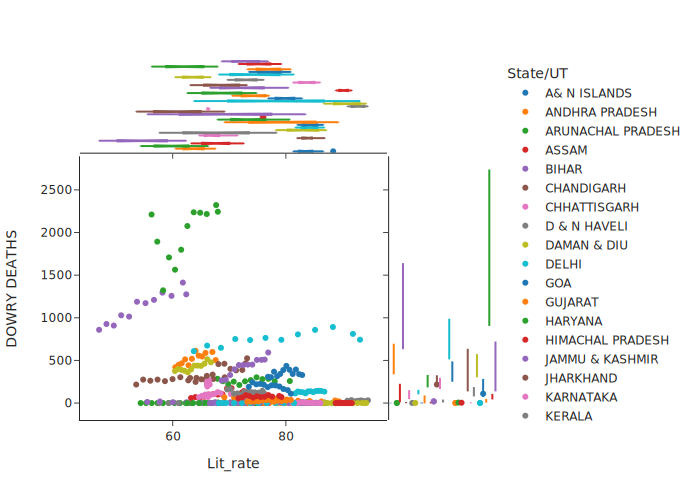

In [237]:
fig = px.scatter(df, x="Lit_rate", y="DOWRY DEATHS", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

#### Assam has the highest number of reported dowry deaths in the country, with a shocking 2,830 cases. Lakshadweep, on the other hand, has no reported dowry deaths

### Each state VS Lit rate vs Type of Crime(INSULT TO MODESTY OF WOMEN)

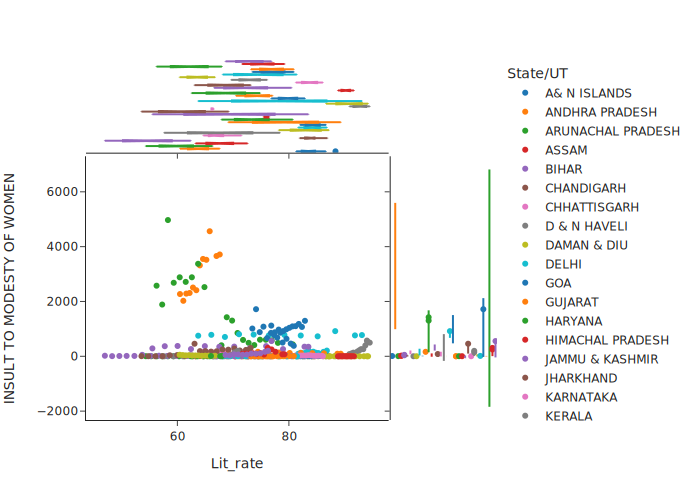

In [238]:
fig = px.scatter(df, x="Lit_rate", y="INSULT TO MODESTY OF WOMEN", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

#### Uttar Pradesh has the highest number of reported cases of insult to the modesty of women (4,970), a serious issue. Lakshadweep, on the other hand, has no reported cases.

### Each state VS Lit rate vs Type of Crime(CRUELTY BY HUSBAND OR HIS RELATIVES)

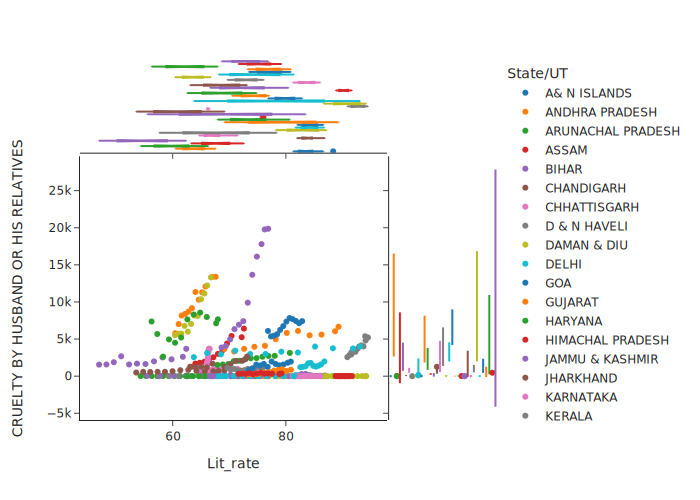

In [239]:
fig = px.scatter(df, x="Lit_rate", y="CRUELTY BY HUSBAND OR HIS RELATIVES", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

#### West Bengal has a disturbingly high number of reported cases of cruelty by husband or his relatives (19,360), the most in the country. Lakshadweep, on the other hand, has no reported cases.

### Each state VS Lit rate vs Type of Crime(IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES)

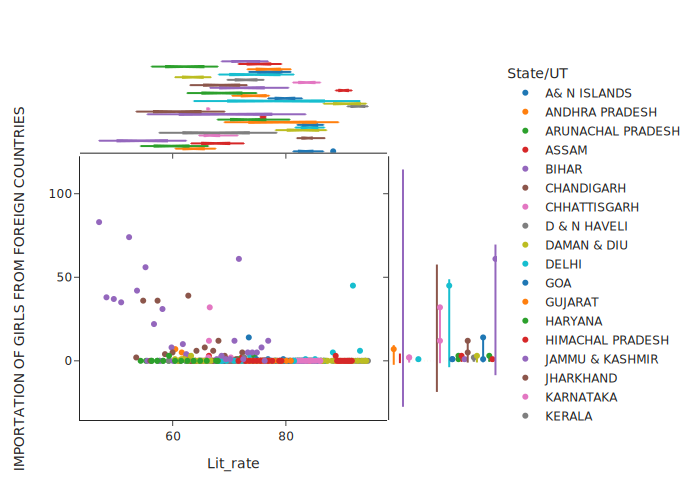

In [240]:
fig = px.scatter(df, x="Lit_rate", y="IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

#### Bihar has the highest reported number of cases of importation of girls from foreign countries (2380), a concerning trend. In contrast, Lakshadweep, Kerala, and Mizoram have no reported cases.

### Each state VS Lit rate vs Type of Crime(CAUSING DEATH BY NEGLIGENCE)

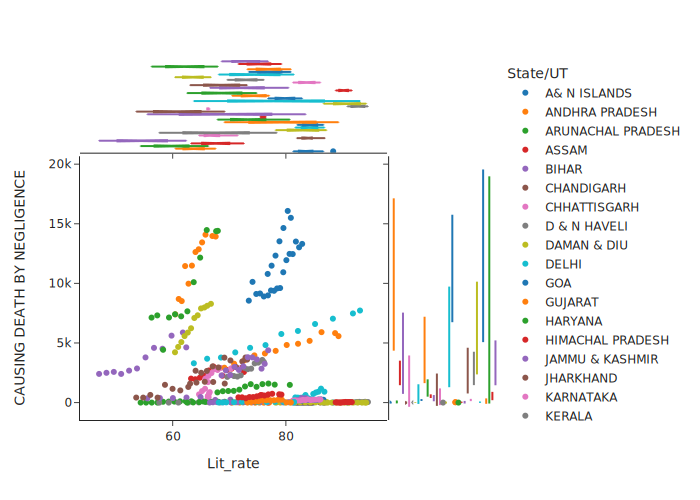

In [241]:
fig = px.scatter(df, x="Lit_rate", y="CAUSING DEATH BY NEGLIGENCE", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

#### Tamil Nadu stands out with a very high number of causing death by negligence cases (16,070), the most in India. In contrast, Lakshadweep has reported no such cases.

### Each state VS Lit rate vs Type of Crime(OTHER IPC CRIMES)

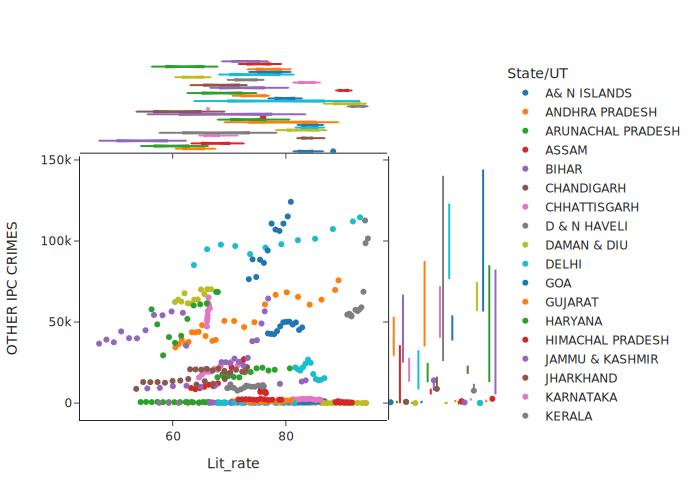

In [242]:
fig = px.scatter(df, x="Lit_rate", y="OTHER IPC CRIMES", color="State/UT", marginal_y="violin",
           marginal_x="box",  template="simple_white")
fig.show(renderer='svg')

#### State Tamil Nadu has 124.17K (highest) numbers of OTHER IPC Crimes cases and Lakshdweep have 5 OTHER IPC CRIMES cases

#### he analysis reveals an interesting contrast. Lakshadweep, despite having a good literacy rate (lower than Kerala but higher than most other states/UTs), has the lowest crime rates across all categories examined.

## 2.3 Analysis of year-on-year total crime rate.

- Crime rate= e following formula is used to calculate a crime rate
- CR=TC/P∗100,000
- Where CR is the rate of crimes per 100,000 people
- TC is the total number of crimes committed in an area
- P is the total population of the area

In [243]:
df_states=df[['State/UT','Year','Crime Rate']]

In [244]:
select_andman = df_states.loc[df['State/UT'] == 'A& N ISLANDS']
select_andhra = df_states.loc[df['State/UT'] == 'ANDHRA PRADESH']
select_arunachal = df_states.loc[df['State/UT'] == 'ARUNACHAL PRADESH']
select_assam4 = df_states.loc[df['State/UT'] == 'ASSAM'] 
select_bihar = df_states.loc[df['State/UT'] == 'BIHAR'] 
select_chandigarh = df_states.loc[df['State/UT'] == 'CHANDIGARH']
select_chhatisgarh = df_states.loc[df['State/UT'] == 'CHHATTISGARH']
select_haveli = df_states.loc[df['State/UT'] == 'D & N HAVELI']
select_daman = df_states.loc[df['State/UT'] == 'DAMAN & DIU']
select_delhi = df_states.loc[df['State/UT'] == 'DELHI']  
select_goa = df_states.loc[df['State/UT'] == 'GOA']
select_gujarat = df_states.loc[df['State/UT'] == 'GUJARAT']
select_haryana = df_states.loc[df['State/UT'] == 'HARYANA']
select_himachal = df_states.loc[df['State/UT'] == 'HIMACHAL PRADESH']
select_jk = df_states.loc[df['State/UT'] == 'JAMMU & KASHMIR']
select_jharkhand = df_states.loc[df['State/UT'] == 'JHARKHAND']
select_karnataka = df_states.loc[df['State/UT'] == 'KARNATAKA'] 
select_kerala= df_states.loc[df['State/UT'] == 'KERALA'] 
select_lakshdweep= df_states.loc[df['State/UT'] == 'LAKSHADWEEP']
select_mp= df_states.loc[df['State/UT'] == 'MADHYA PRADESH']
select_maharashtra = df_states.loc[df['State/UT'] == 'MAHARASHTRA']  
select_manipur= df_states.loc[df['State/UT'] == 'MANIPUR'] 
select_meghalaya = df_states.loc[df['State/UT'] == 'MEGHALAYA']
select_mizoram = df_states.loc[df['State/UT'] == 'MIZORAM'] 
select_nagaland= df_states.loc[df['State/UT'] == 'NAGALAND']
select_odisha= df_states.loc[df['State/UT'] == 'ODISHA']
select_puducherry = df_states.loc[df['State/UT'] == 'PUDUCHERRY']
select_punjab = df_states.loc[df['State/UT'] == 'PUNJAB']
select_rajasthan = df_states.loc[df['State/UT'] == 'RAJASTHAN']
select_sikkim = df_states.loc[df['State/UT'] == 'SIKKIM']
select_tamilnadu = df_states.loc[df['State/UT'] == 'TAMIL NADU']
select_tripura= df_states.loc[df['State/UT'] == 'TRIPURA']
select_up = df_states.loc[df['State/UT'] == 'UTTAR PRADESH']
select_uk= df_states.loc[df['State/UT'] == 'UTTARAKHAND']
select_wb= df_states.loc[df['State/UT'] == 'WEST BENGAL']

### Crime Rate Analysis of A & Islands year wise

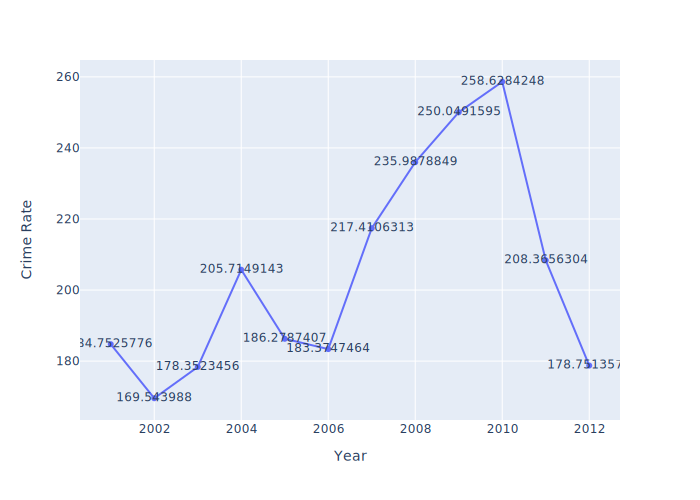

In [245]:
fig = px.line(select_andman, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### Looking at the line graph, it seems the crime rate in the Andaman and Nicobar Islands was lowest in 2002 and then rose to its highest level in 2010.

### Crime Rate Analysis of Andhra Pradesh year wise

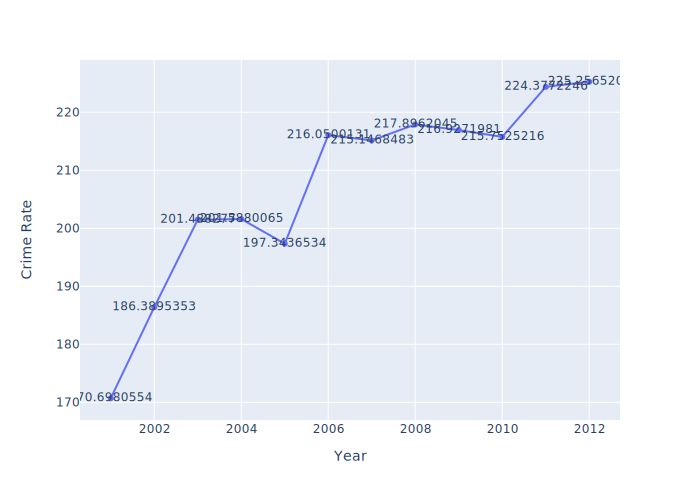

In [246]:
fig = px.line(select_andhra, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### An analysis of the plot reveals an upward trend in crime rates over time in Andhra Pradesh.

### Crime Rate Analysis of Arunachal Pradesh year wise

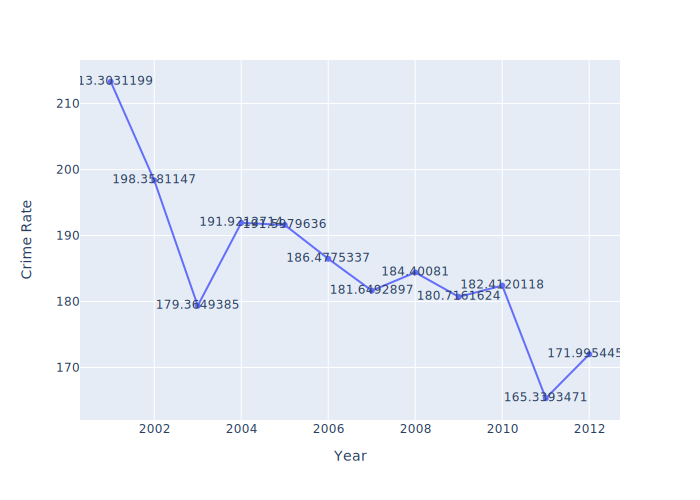

In [247]:
fig = px.line(select_arunachal, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### The line plot for Arunachal Pradesh shows a promising trend. Crime rates were highest in 2001 and have been steadily decreasing since then, reaching their lowest point in 2012.

### Crime Rate Analysis of Assam year wise

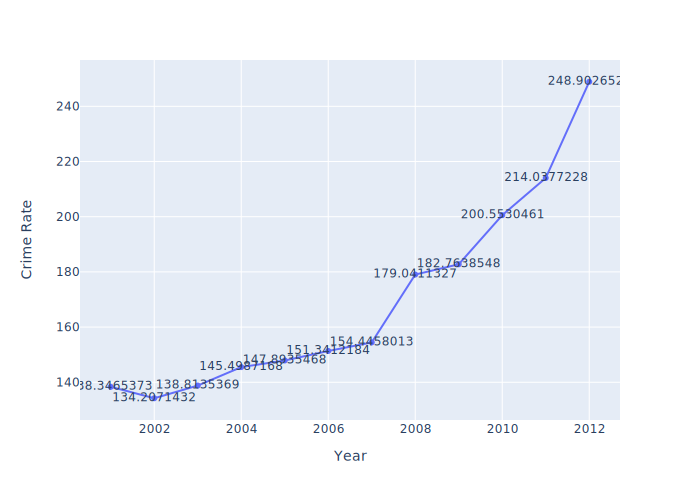

In [248]:
fig = px.line(select_assam4, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### The line plot for Assam reveals a troubling trend. Crime rates were at their lowest in 2001 and have since increased significantly, reaching their highest point in 2012.

### Crime Rate Analysis of Bihar year wise

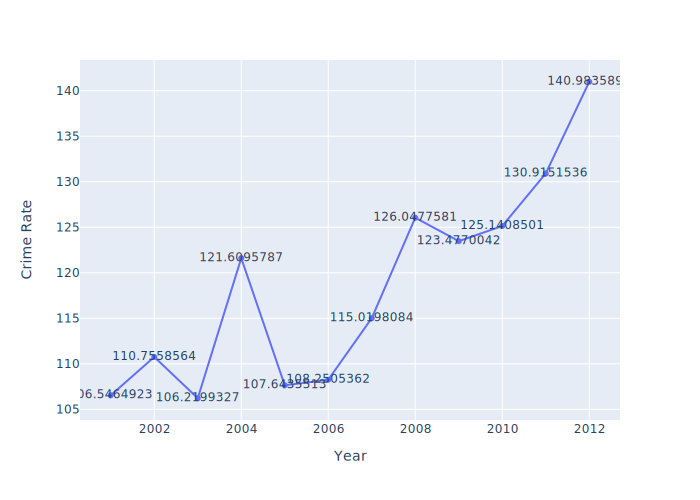

In [249]:
fig = px.line(select_bihar, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### The line plot shows a rise in crime rates in the period 2001-2004, followed by a decrease. However, crime rates then began to increase again, reaching a peak in 2012.

### Crime Rate Analysis of Chandigarh year wise

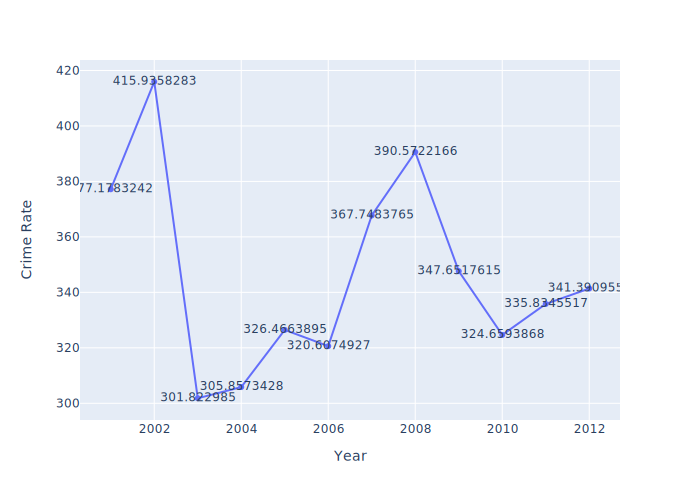

In [250]:
fig = px.line(select_chandigarh, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### The plot reveals a volatile crime pattern. From 2001 to 2002, crime rates reached their highest point. However, 2003 saw a significant decrease, bringing them to their lowest level. The following years continued this fluctuation, with another rise in crime rates by 2008. There was a temporary dip in 2010, but the trend reversed, with crime rates on the rise again by 2012.

### Crime Rate Analysis of Chhatisgarh year wise

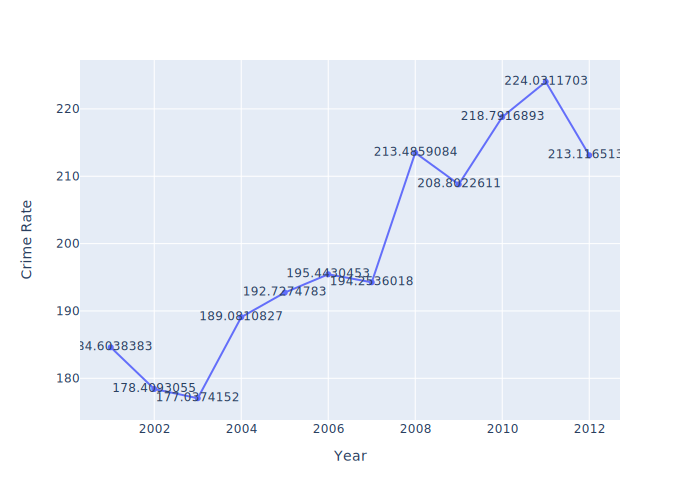

In [251]:
fig = px.line(select_chhatisgarh, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### The data indicates that crime rates reached their lowest point in 2003. However, there was a subsequent upward trend, with crime rates reaching their highest level in 2011.

### Crime Rate Analysis ofD & N Haveli year wise

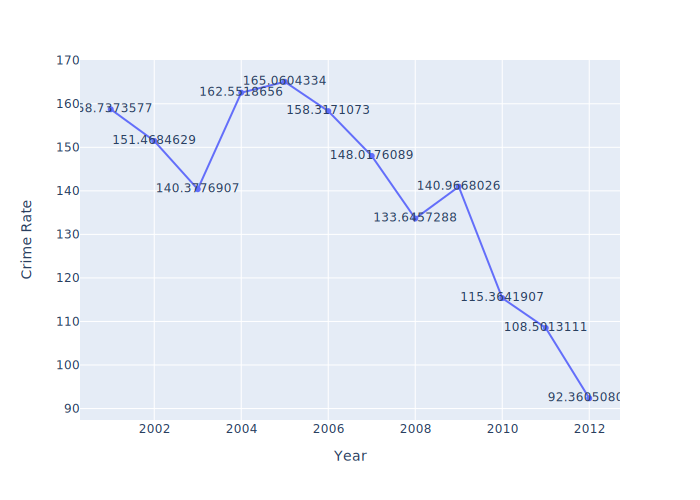

In [252]:
fig = px.line(select_haveli, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### The data suggests a downward trend in crime rates over time.

#### Crime Rate Analysis of Daman & Diu year wise

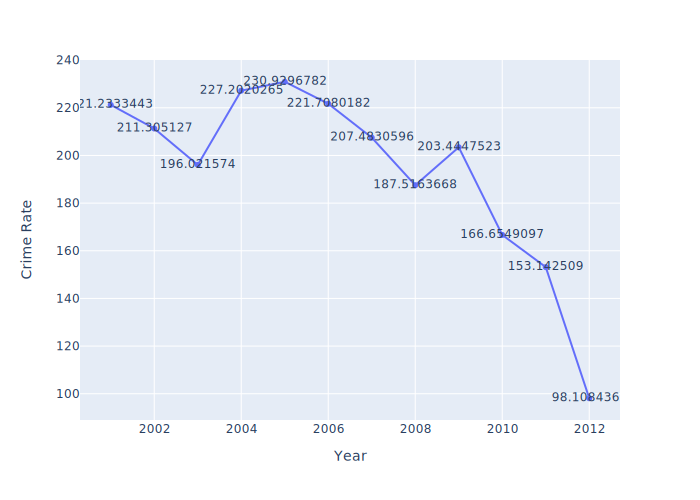

In [253]:
fig = px.line(select_daman, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### According to the data, Daman & Diu experienced a peak crime rate in 2005. Since then, there has been a continuous decline in crime rates up to 2012.

### Crime Rate Analysis of Delhi year wise

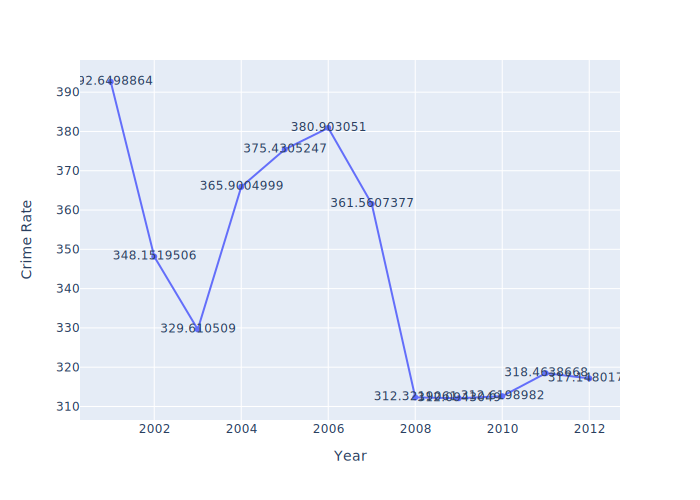

In [254]:
fig = px.line(select_delhi, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### While there were fluctuations, Delhi's crime rate has shown a general downward trend over time. After a peak in 2001, it decreased, then rose slightly between 2003 and 2006. However, it continued to decline and reached its lowest point in 2018. Despite a slow increase until 2012, the overall trend suggests a decrease in crime rates in Delhi.

### Crime Rate Analysis of GOA year wise

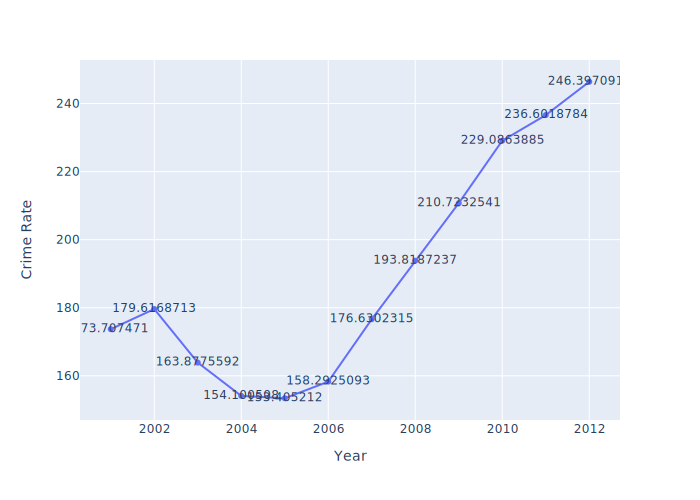

In [255]:
fig = px.line(select_goa, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### The data indicates a period of relatively low crime rates, followed by a significant increase starting in 2006. This trend culminated in the highest crime rate recorded in 2012.

### Crime Rate Analysis of GUJARAT year wise

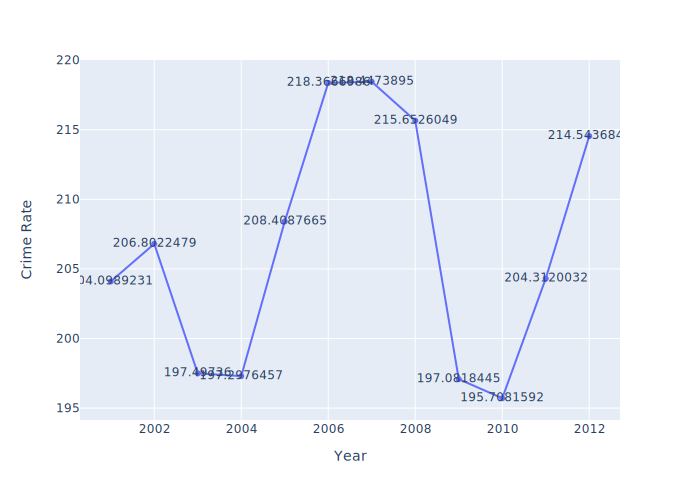

In [256]:
fig = px.line(select_gujarat, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### The crime rate exhibited a fluctuating trend. After a rise in crime rates, 2007 marked the peak. Following this peak, there was a decrease in crime rates, reaching a low point in 2010. However, the trend reversed again, with crime rates increasing until 2012.

### Crime Rate Analysis of HARYANA year wise

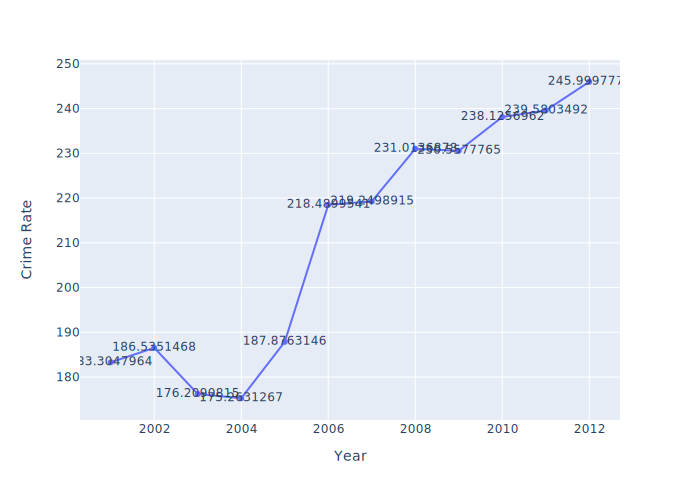

In [257]:
fig = px.line(select_haryana, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### The data shows a period of relative stability in crime rates between 2001 and 2004. However, a concerning upward trend emerged from 2004 onwards, culminating in the highest crime rate recorded in 2012.

### Crime Rate Analysis of HIMACHAL PRADESH year wise

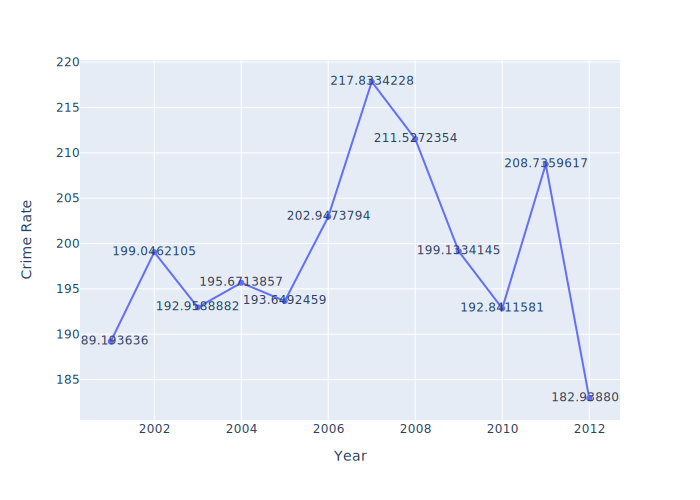

In [258]:
fig = px.line(select_himachal, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### Himachal Pradesh's crime rate data shows a peak in 2008, followed by a significant decrease by 2012.

### Crime Rate Analysis of JAMMU & KASHMIR year wise

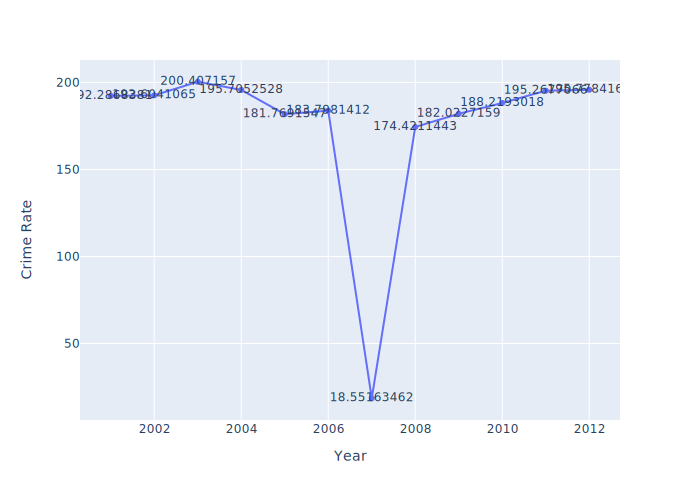

In [259]:
fig = px.line(select_jk, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### The plot reveals a particularly noteworthy pattern in crime rates for Jammu and Kashmir. While crime rates generally appear high, there's a sharp decrease in 2006, reaching the lowest point recorded. However, this is followed by a sudden and significant increase.

### Crime Rate Analysis of JHARKHAND year wise

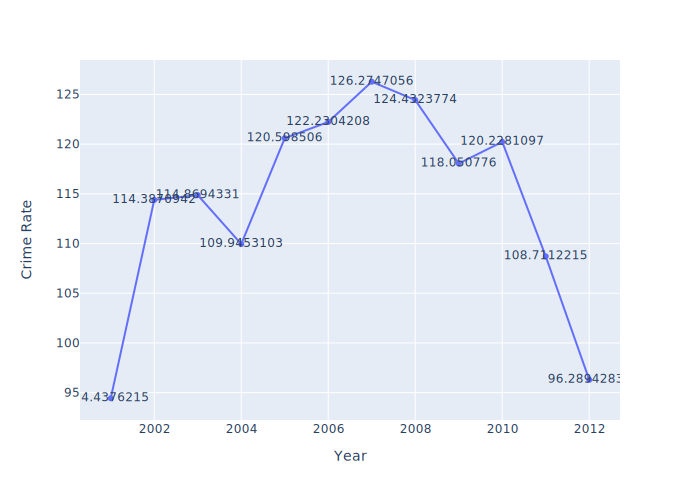

In [260]:
fig = px.line(select_jharkhand, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### Jharkhand experienced a period of high crime rates between 2002 and 2010. However, data shows a positive trend since 2012, with crime rates exhibiting a decrease.

### Crime Rate Analysis of Karnataka year wise

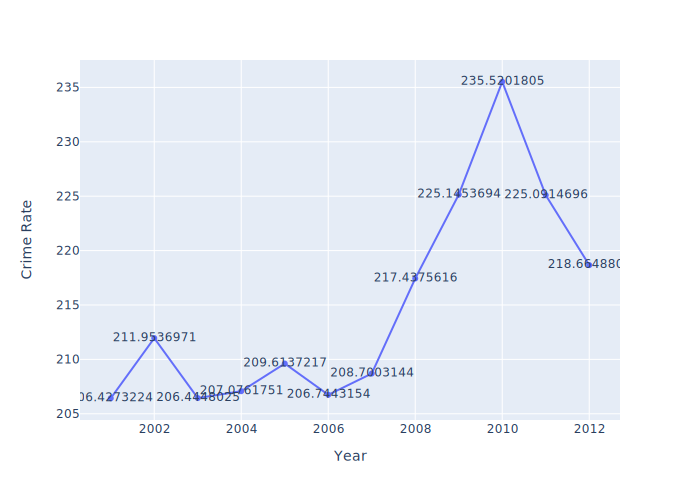

In [261]:
fig = px.line(select_karnataka, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### While the crime rate trend line initially indicated a low point, there was a subsequent rise between 2007 and 2010. However, the trend reversed again, with crime rates decreasing until 2012.

### Crime Rate Analysis of Kerala year wise

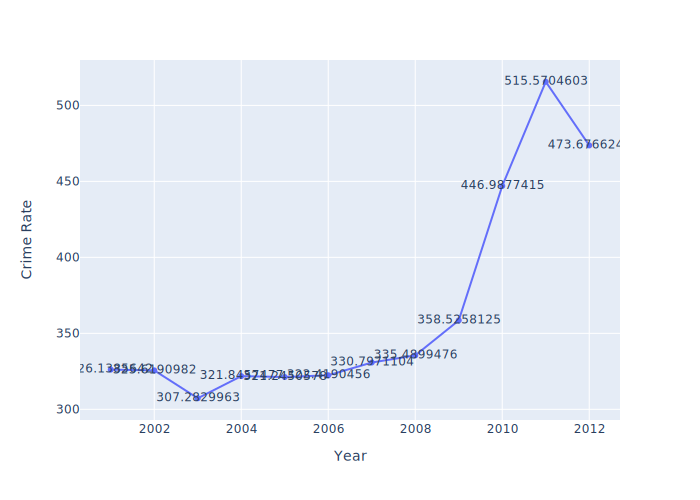

In [262]:
fig = px.line(select_kerala, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### An analysis of the data reveals a steady increase in crime rates from 2007 to 2011.

### Lakshdweep Crime rate yearly analysis

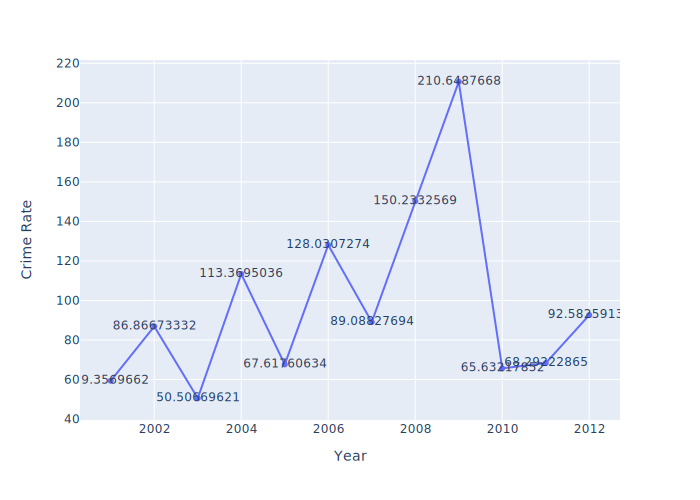

In [263]:
fig = px.line(select_lakshdweep, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### The graph shows a fluctuating pattern in crime rates, with 2009 marking the year with the highest rate.

### For MadhyaPradesh Crime Rate Analysis Yearly

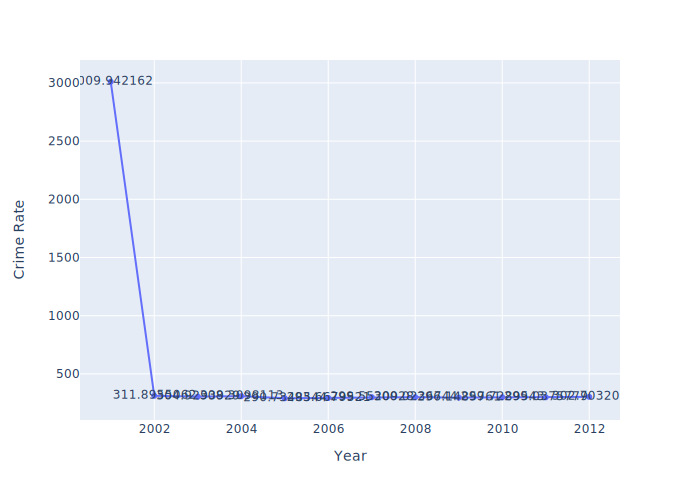

In [264]:
fig = px.line(select_mp, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### The data shows a spike in crime rates in 2001, followed by a sharp decline. The crime rate then appears to have stabilized at a normal level until 2012.

### Maharashtra Crime Rate Analysis Year wise

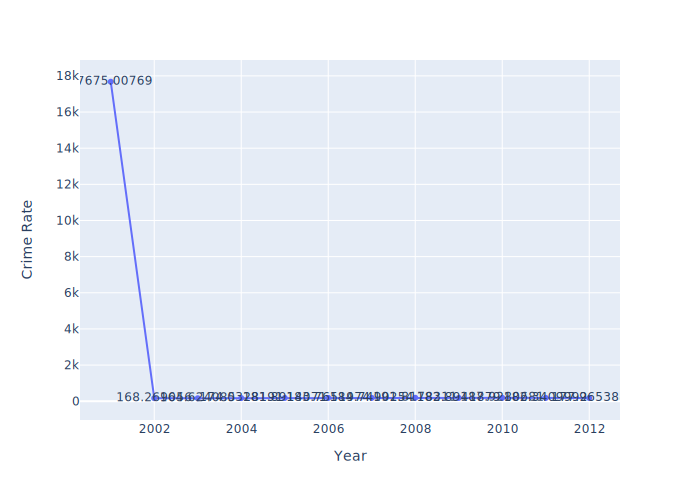

In [265]:
fig = px.line(select_maharashtra, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### Data for 2001 indicates that this state had the highest crime rate compared to other states. However, the crime rate subsequently decreased.

#### Manipur Crime rate Analysis year wise

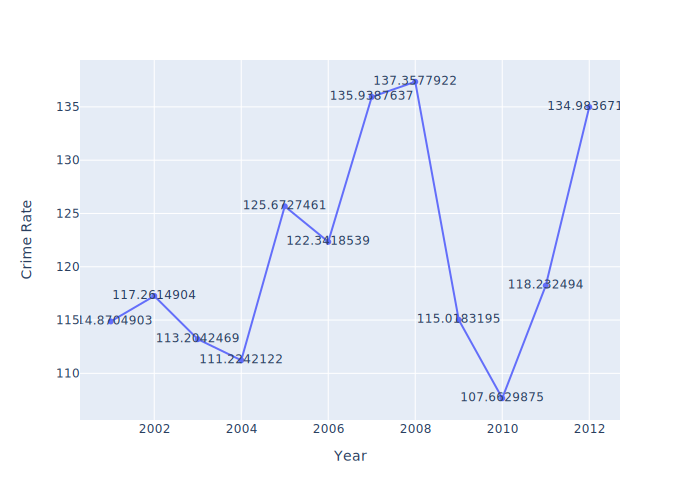

In [266]:
fig = px.line(select_manipur, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### Manipur's crime rate appears to have fluctuated over the period in question. Data shows the crime rate was at its lowest in 2010, but reached its highest point in 2008.

### Meghylaya Crime rate Analysis Year wise

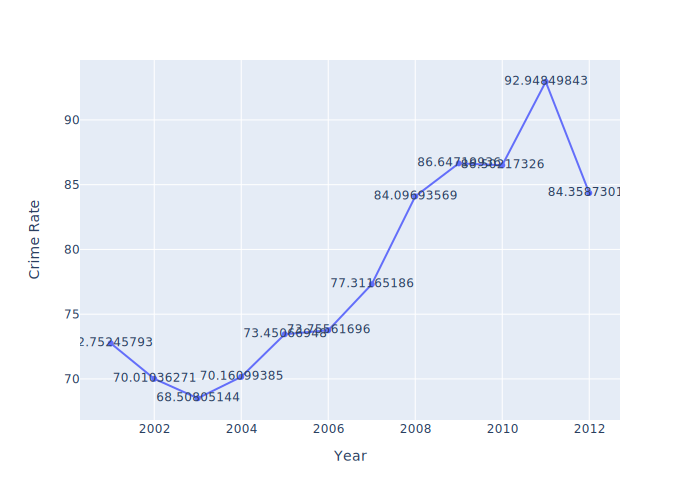

In [267]:
fig = px.line(select_meghalaya, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### Meghayala state had lowest crime rate in 2003 and highest was in 2011

#### Mizoram Crime Rate Analysis Year wise

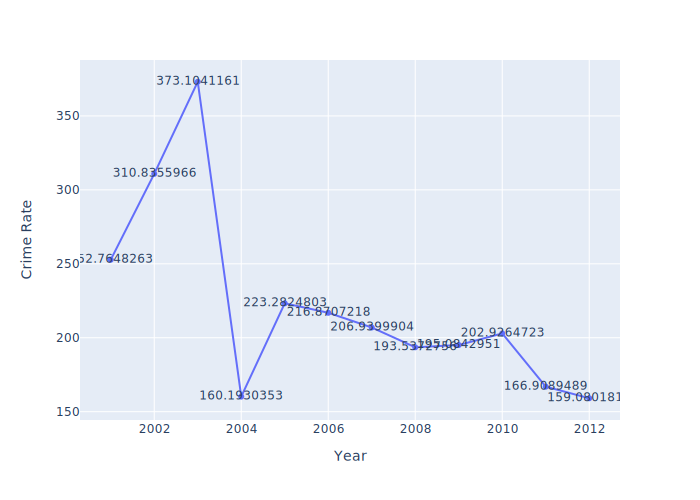

In [268]:
fig = px.line(select_mizoram, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### Crime in Mizoram reached its lowest point in 2012, after a peak in 2003.

### Nagaland Crime Rate Analysis Year wise

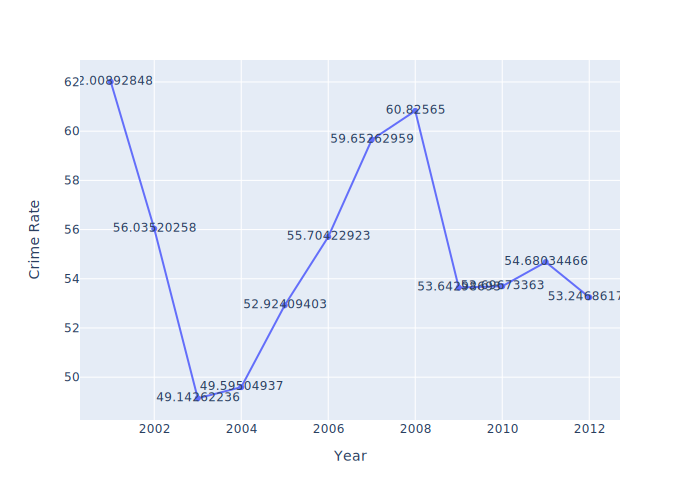

In [269]:
fig = px.line(select_nagaland, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### Nagaland crime rate was lowest in 2003 and highest was in 2001

### Odisha Crime rate Analysis year wise

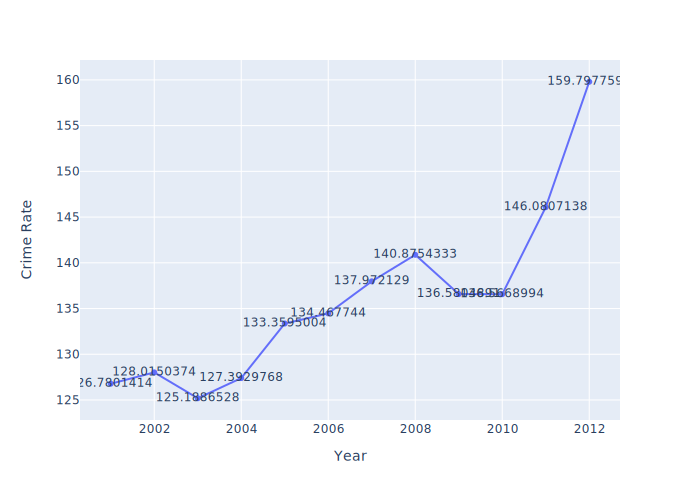

In [270]:
fig = px.line(select_odisha, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### In contrast to 2012, when crime rates were at their highest, Odisha experienced much lower crime rates in 2003.

### PuduCherry Crime rate Analysis

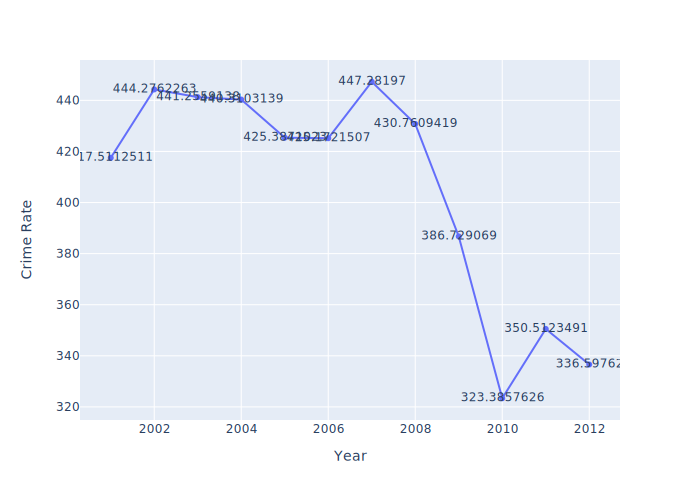

In [271]:
fig = px.line(select_puducherry, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### Unlike 2007, which saw the highest crime rates, Puducherry had a significantly lower crime rate in 2010.

### Punjab Crime rate Analysis Year wise

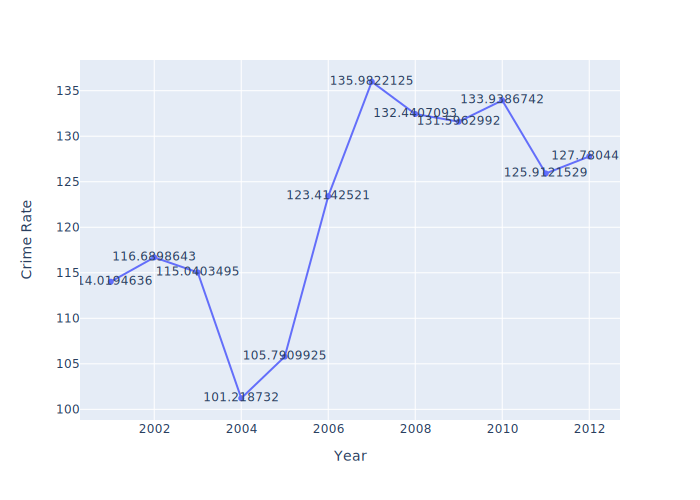

In [272]:
fig = px.line(select_punjab, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### Crime rate of Punjab was lowest in 2004 and highest was in 2007

### Tamil Nadu Crime Rate Analyss year wise

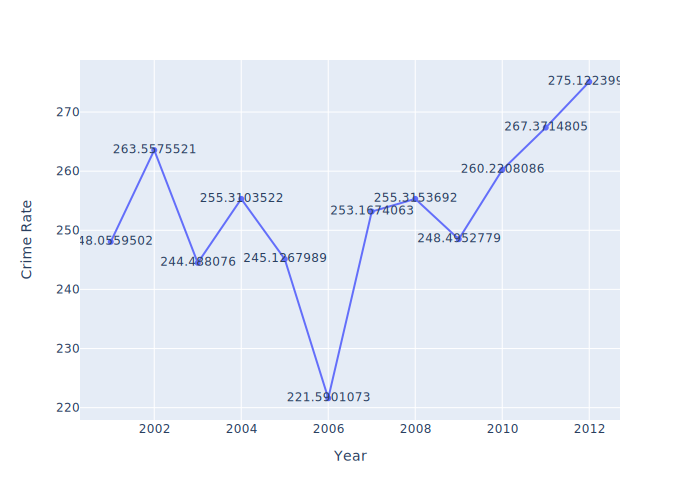

In [273]:
fig = px.line(select_tamilnadu, x='Year', y='Crime Rate', text='Crime Rate', markers=True)
fig.show(renderer='svg')

#### Tamil Nadu saw a surge in crime in 2012, which was the highest recorded compared to 2006, when crime rates were at their lowest.

### 2.4 Analysis of area vs overall crime

In [274]:
df_area=df.groupby('Area (km2)').min()

In [275]:
dfarea=pd.pivot_table(df, values ='Area (km2)', index =['State/UT','Year','Total Crimes'],
                          aggfunc = max)
dfarea

Area (km2)
State/UT     Year Total Crimes            
A& N ISLANDS 2001 1386                8249
             2002 1269                8249
             2003 1352                8249
             2004 1612                8249
             2005 1462                8249
...                                    ...
WEST BENGAL  2008 232767             88752
             2009 248291             88752
             2010 284277             88752
             2011 314488             88752
             2012 353008             88752

[420 rows x 1 columns]

#### here is a list of all the state, year and total crimes under 2km radius

In [276]:
df_area=df[['State/UT','Year','Total Crimes','Area (km2)']]
df_area

State/UT  Year  Total Crimes  Area (km2)
0         A& N ISLANDS  2001          1386        8249
1       ANDHRA PRADESH  2001        278982      275045
2    ARUNACHAL PRADESH  2001          5243       83743
3                ASSAM  2001         81418       78438
4                BIHAR  2001        189612       94163
..                 ...   ...           ...         ...
415         TAMIL NADU  2012        415626      130058
416            TRIPURA  2012         13461       10486
417      UTTAR PRADESH  2012        444403      240928
418        UTTARAKHAND  2012         20122       53483
419        WEST BENGAL  2012        353008       88752

[420 rows x 4 columns]

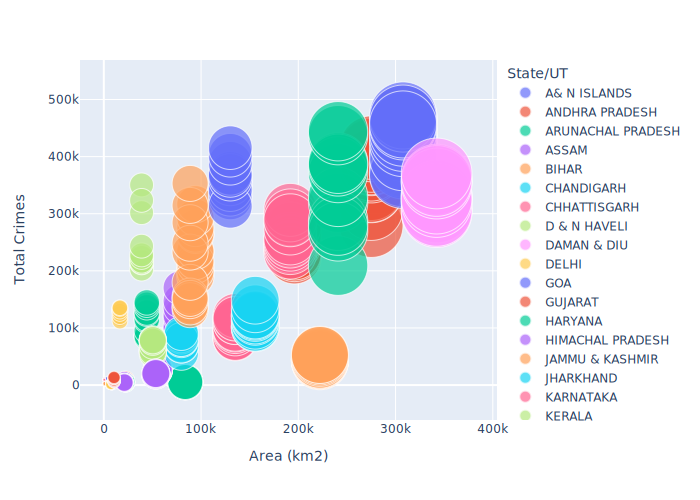

In [277]:
fig = px.scatter(df_area, x="Area (km2)", y="Total Crimes", size="Area (km2)",color='State/UT',
                  size_max=50)
fig.show('svg')

#### This scatter plot visualizes the relationship between a state or union territory's total crime rate (y-axis) and its area (x-axis). Since the area of each state/UT is fixed, the circles representing them are all the same size. The colors differentiate between the states/UTs.

#### The data visualized in this scatter plot suggests a possible connection between the size of a state (area) and the total number of crimes reported. Smaller states, like Lakshdweep (72 km²) with only 127 total crimes, and Puducherry (479 km²) with 9,252 total crimes, appear to have fewer total crimes compared to larger states. Even though Rajasthan (342,239 km²) has the biggest area, Uttar Pradesh (240,928 km²) has the highest number of reported crimes (444,403 compared to Rajasthan's 370,502). It's important to remember that this is just a correlation, and there might be other reasons why crime rates vary across states.

## 2.5 Analysis of Population vs overall Crime

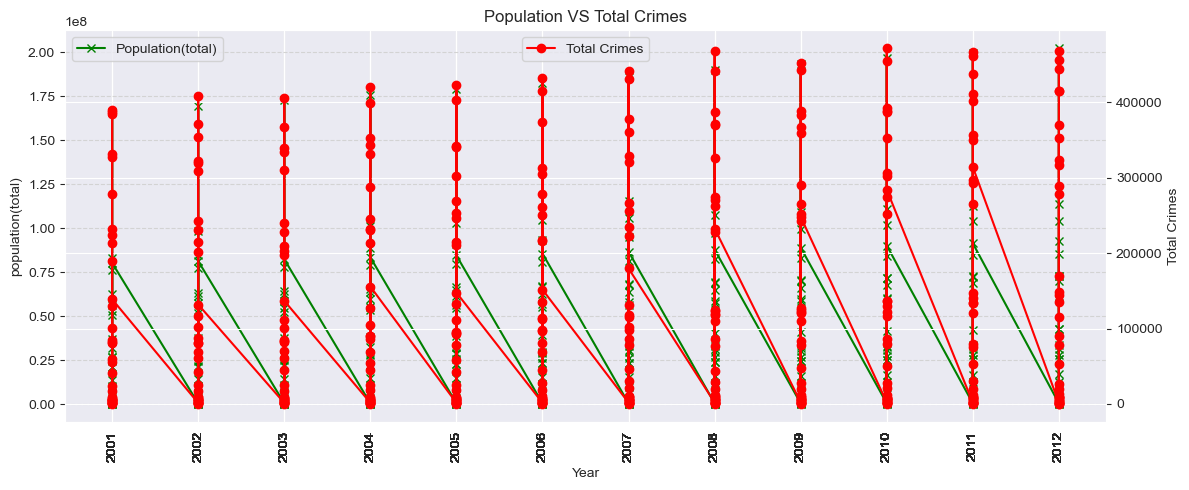

In [278]:
fig, ax = plt.subplots(figsize=(12,5))
ax2 = ax.twinx()
ax.set_title('Population VS Total Crimes')
ax.set_xlabel('Year')



ax.plot(df['Year'],df['population(total)'], color='green', marker='x')
ax2.plot(df['Year'],df['Total Crimes'], color='red', marker='o')



ax.set_ylabel('population(total)')
ax2.set_ylabel('Total Crimes')
ax.legend(['Population(total)'])
ax2.legend(['Total Crimes'], loc='upper center')
ax.set_xticks(df['Year'])
ax.set_xticklabels(df['Year'], rotation=90)
ax.yaxis.grid(color='lightgray', linestyle='dashed')

plt.tight_layout()
plt.show()

#### This line plot appears to show a trend between population growth and total crimes. The x-axis tracks the increase in population year by year, and the left y-axis displays the corresponding population data. Interestingly, the total number of crimes (shown on the right y-axis) also seems to rise along with the population. It's worth noting that this might just be a correlation, and other factors could influence crime rates as well.

#### While population size undoubtedly plays a role in crime rates, it's not the only factor. Socioeconomic factors also significantly influence the number of crimes happening in a particular location.

## 2.6 Each state crime report. 

In [279]:
tc= df.groupby("State/UT")["TOTAL IPC CRIMES"].sum().sort_values(ascending = False)
print("Crime by Each state:\n",tc)

Crime by Each state:
 State/UT
MADHYA PRADESH       2413770
MAHARASHTRA          2273436
TAMIL NADU           2060176
ANDHRA PRADESH       2018981
UTTAR PRADESH        1858074
RAJASTHAN            1855916
KARNATAKA            1481063
KERALA               1437459
GUJARAT              1385775
BIHAR                1346293
WEST BENGAL          1119304
ODISHA                647946
DELHI                 633174
ASSAM                 597764
HARYANA               595303
CHHATTISGARH          561027
JHARKHAND             422351
PUNJAB                384131
JAMMU & KASHMIR       259155
HIMACHAL PRADESH      154948
UTTARAKHAND           103204
PUDUCHERRY             54116
TRIPURA                52734
CHANDIGARH             40807
MANIPUR                35072
GOA                    32051
ARUNACHAL PRADESH      27652
MIZORAM                26146
MEGHALAYA              25249
NAGALAND               13133
A& N ISLANDS            9102
SIKKIM                  7000
D & N HAVELI            4651
DAMAN & DIU 

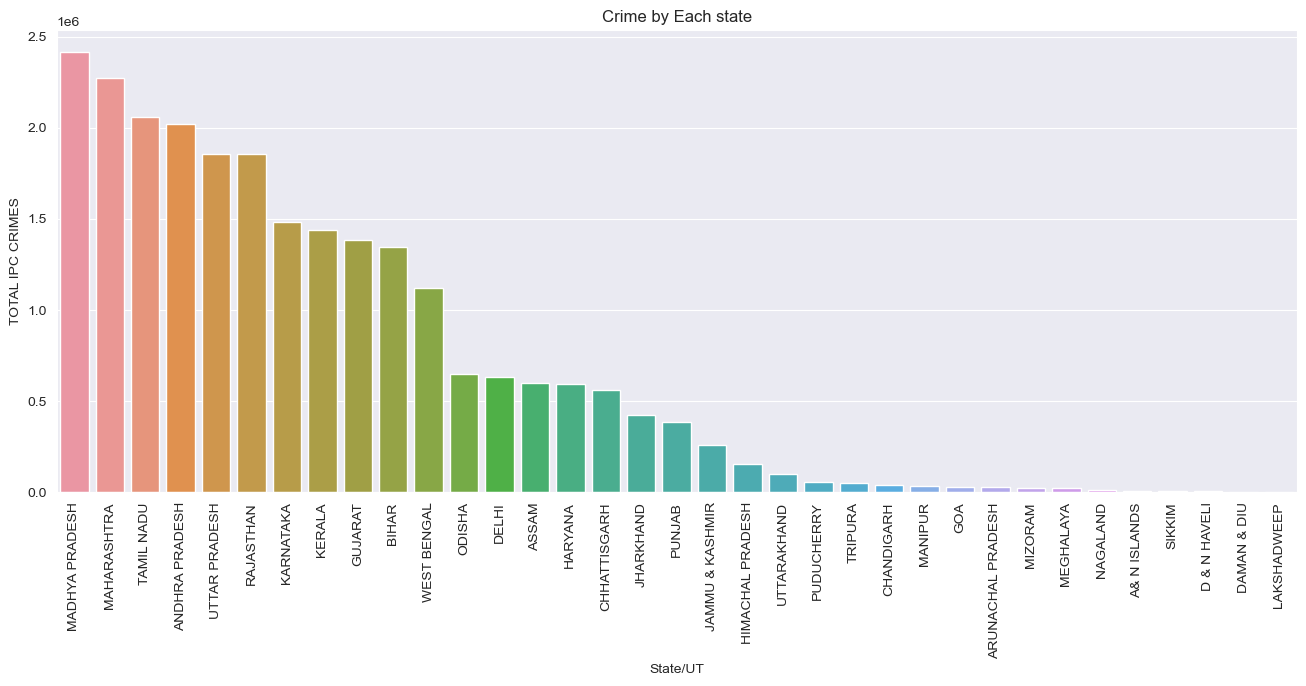

In [280]:
plt.figure(figsize=(16,6))
sns.barplot(x = tc.index[:36], y = tc[:36]).set(title = "Crime by Each state")
plt.xticks(rotation='vertical')
plt.show()

#### This graph appears to indicate that Madhya Pradesh has the highest number of crimes in India, while Lakshwadeep has the lowest.

In [281]:
tcr= df.groupby("State/UT")["Crime Rate"].sum().sort_values(ascending = False)
print("Crime  Rate  of Each state:\n",tcr)

Crime  Rate  of Each state:
 State/UT
MAHARASHTRA          19655.285754
MADHYA PRADESH        6316.673756
PUDUCHERRY            4869.180671
KERALA                4385.598206
CHANDIGARH            4155.725611
DELHI                 4126.855153
TAMIL NADU            3037.821579
RAJASTHAN             2946.820293
MIZORAM               2661.527940
KARNATAKA             2578.819811
HARYANA               2532.205598
ANDHRA PRADESH        2488.914059
GUJARAT               2478.217328
A& N ISLANDS          2457.210401
CHHATTISGARH          2389.783310
HIMACHAL PRADESH      2386.476742
DAMAN & DIU           2324.749802
GOA                   2276.257698
ARUNACHAL PRADESH     2227.536009
JAMMU & KASHMIR       2100.831570
ASSAM                 2035.844909
D & N HAVELI          1675.369068
ODISHA                1633.077477
TRIPURA               1509.964138
PUNJAB                1463.824145
MANIPUR               1453.769068
BIHAR                 1422.610111
JHARKHAND             1370.455004
WEST BENGA

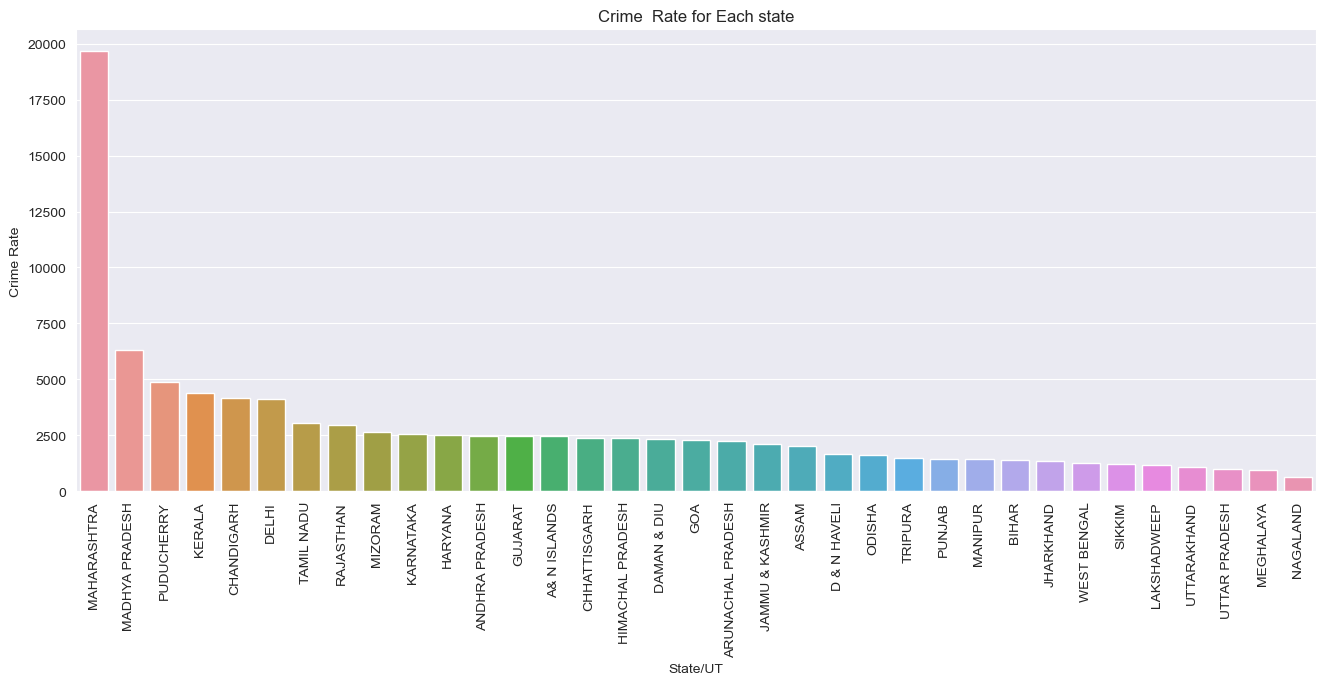

In [282]:
plt.figure(figsize=(16,6))
sns.barplot(x = tcr.index[:36], y = tcr[:36]).set(title = "Crime  Rate for Each state")
plt.xticks(rotation='vertical')
plt.show()

#### Since This Graph Shows that Maharastra Has the highest Crime rate

## Conclusion:These graphs and analyses provided insights into how crime rates vary across Indian states from 2001 to 2012. We observed how different types of crimes are reported in each state. Interestingly, the data suggests that Maharashtra and Madhya Pradesh consistently reported the highest total crime rates throughout this period. Additionally, the analysis revealed a possible connection between population growth and overall crime rates.